# Progetto Data Mining
Secondo l'Organizzazione mondiale della sanità (OMS) l'ictus è la seconda causa di morte a livello globale, responsabile di circa l'11% dei decessi totali.
Obiettivo del progetto è effettuare un tipico processo di Data Mining, utilizzando tecniche statistiche congiunte ad algoritmi di Machine Learning per compiere un task di classificazione del dataset allegato, al fine di predire  se un paziente possa avere un ictus in base ai parametri di input come sesso, età, varie malattie e abitudine al fumo. Ciascuna riga dei dati fornisce informazioni pertinenti sul paziente.

Informazioni sugli attributi

* 1) id paziente
* 2) gender: "Male", "Female" or "Other"
* 3) age: età del paziente
* 4) hypertension: 0 assenza di hypertension, 1 presenza di hypertension
* 5) heart_disease: 0 assenza di heart diseases, 1 presenza heart disease
* 6) ever_married: "No" o "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" o "Self-employed"
* 8) Residence_type: "Rural" o "Urban"
* 9) avg_glucose_level: livelli medi di glucosio nel sangue
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" o "Unknown"*
* 12) stroke: 1 paziente con ictus 0 paziente senza ictus
** Nota: "Unknown" in smoking_status significa che l'informazione non è presente. Allo stesso modo "Other" nel campo gender.


## Step 1
Effettuare una descrizione introduttiva del dataset, dimostrando di:

* avere familiarità con il dataset stesso,
* conoscere a cosa si riferiscono i vari attributi presenti, indicarne il
tipo statistico ed esplicitare quale sia l’attributo target,
* indicare le problematiche preliminari che sono state individuate
in termini di numerosità del dataset, presenza di dati mancanti,
presenza di duplicati, presenza di dati non consistenti o
ridondanti ecc.,
* considerato il dataset e lo stesso attributo target, è possibile
effettuare task di analisi diversi dalla classificazione? Motivare la
risposta.
* considerato il dataset e le prime 11 features che tipo di analisi è possibile effettuare? Motivare la
risposta.

### Svolgimento

L'ictus è la seconda causa di mortalità più comune nel mondo e la terza causa di disabilità più comune. 
<br/><br/>
L'**ipertensione** è il _fattore di rischio più diffuso per l'ictus_. Le cause dell'ictus e le conseguenze emodinamiche sono eterogenee, il che rende complessa la gestione della pressione sanguigna nei pazienti colpiti da ictus, che richiede una diagnosi accurata e una definizione precisa degli obiettivi terapeutici. 
<br/><br/>
Anche il **fumo** è una delle principali cause di ictus e ci sono studi scientifici che ne dimostrano una stretta correlazione. Dalle ricerche effettuate sulla rete non sono riuscito a trovare riferimenti ad una _correlazione_ fra **BMI** (body mass index) e **stroke** (ictus). 

<br/><br/>
L'obiettivo di questo studio è costruire un modello di apprendimento per prevedere l'ictus e valutare l'accuratezza del modello stesso. Esplorerò diversi algoritmi di classificazione per vedere quale produce risultati affidabili e ripetibili. 

I modelli scelti per lo studio sono: 
* Decision Tree 
* Logistic Regression 
* Random Forest 
* Support Vector Machine 
* K Nearest Neighbor 
* Naive Bayes  
* Perceptron 
* Multi Layer Perceptron

Dall'esito della previsione dei modelli, il modello con le migliori prestazioni sarà sottoposto al processo di convalida incrociata per valutarne la ripetibilità.

Per i ragionamenti utilizzerò i dati forniti nel dataset denominato _dataset_Stroke.csv_ e considero come fattore rilevante (target) la _feature_ del dataset (colonna) denominata **stroke**. <br/><br/>
Questa la notazione per la classificazione già fornita nel dataset: <br/>
* <code>stroke==0</code> il paziente NON ha probabilità di essere affetto da ictus
* <code>stroke==1</code> il paziente ha probabilità di essere affetto da ictus

Successivamente fornirò in input al mio algoritmo i dati di test forniti nel dataset denominato _dataset_Stroke_val.csv_ nascondendo opportunamente l'ultima colonna. 

Verificherò quindi che la classificazione dei dati in input sia corretta validando i risultati. 
<br/><br/>

I dati che possiamo trovare all'interno del dataset sono di tipo qualitativo e quantitativo: abbiamo infatti delle espressioni letterali e dei valori numerici. Valuteremo nelle righe a seguire la distribuzione statistica plottando a video qualche grafico. 

Il dataset di apprendimento è piuttosto ridotto, parliamo di circa 5.000 unità di cui solo il 5% ha avuto ictus, la restante parte no.

Il dataset di apprendimento iniziale è composto da 12 attributi di cui 1 sarà il nostro target <code>stroke</code>. In relazione all'output atteso, che risponde alla domanda: <i>il paziente è/potrà essere affetto da ictus? Si o no? </i> l'unico task eseguibile è la classificazione. 

La classificazione si basa su dati discreti: la macchina analizza le caratteristiche di un oggetto e lo classifica in una categoria binaria o multiclasse a seconda delle necessità. L'output in risposta è dunque un dato discreto e non continuo come potrebbe essere nel task della <i>regressione</i>. 

La regressione infatti mette in relazione dati per fornire in output una stima numerica. Un task di regressione molto comune potrebbe essere quello della previsione del prezzo di un immobile, ma non è il nostro caso.

Un altro task che potrebbe essere applicato al nostro dataset, senza però specificare alcun target, è la classificazione a cluster (caratteristica dell'algoritmo <code>SVC()</code> che andrò ad implementare). Generalmente questi task si utilizzano su modelli di apprendimento non supervisionato e sono utili nel momento in cui si vuole esplorare la correlazione fra i dati senza conoscere a priori il target. 

Essendo il nostro un compito di classificazione di cui conosciamo il target e gli attributi, procederemo con lo sviluppo di algoritmo di ML supervisionato sfruttando i metodi più comune di classificazione binaria e multi-classe. 

# Step 2
Effettuare un’analisi esplorativa del dataset, presentando i risultati sia in formato tabulare che in formato grafico e discutere i risultati,
evidenziando in particolar modo eventuali problematiche riscontrate (es. dati
mancanti, notazioni incosistenti);

### Importo tutte le librerie necessarie per lo studio

In [1]:
# Data Analysis 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns


# Preprocessing dei dati
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Train - Test split
from sklearn.model_selection import train_test_split


# Librerie classificatori scelti
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Metriche di valutazione 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN

from sklearn.model_selection import RandomizedSearchCV

#Apprendimento d'insieme
from sklearn.ensemble import VotingClassifier

# Pipeline e joblib
import joblib
from sklearn.pipeline import Pipeline



Analizzo i due file csv forniti nella cartella di progetto:
* dataset_Stroke.csv --> importato nel dataFrame train
* dataset_Stroke_eval.csv --> importato nel dataFrame test

In [2]:
# leggo il csv che si trova nella stessa cartella quindi non serve indicare il percorso

# creo nel contempo due DataFrame denominati train e test che serviranno rispettivamente per il training

# del nostro algoritmo di ML e la validazione



train = pd.read_csv("dataset_Stroke.csv")

test = pd.read_csv("dataset_Stroke_eval.csv")

In [3]:
#visualizzo le prime 5 (di default) voci del DataFrame "train"

train.head(5)

id  gender   age  hypertension  heart_disease ever_married work_type  \
0  70630  Female  71.0             0              0          Yes  Govt_job   
1  58267    Male  70.0             1              0          Yes   Private   
2  31112    Male  80.0             0              1          Yes   Private   
3  41069  Female  45.0             0              0          Yes   Private   
4  64778    Male  82.0             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Rural             193.94  22.4           smokes       1  
1          Rural             242.52  45.5  formerly smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Rural             224.10  56.6     never smoked       1  
4          Rural             208.30  32.5          Unknown       1

In [4]:
#visualizzo le ultime 3 voci del DataFrame "test"

test.tail(3)

id  gender   age  hypertension  heart_disease ever_married  \
509   9122    Male  25.0             0              0          Yes   
510  25833  Female  43.0             0              0          Yes   
511  17291  Female  63.0             1              0          Yes   

         work_type Residence_type  avg_glucose_level   bmi smoking_status  \
509        Private          Urban              89.87  26.5   never smoked   
510        Private          Rural             107.43  26.5   never smoked   
511  Self-employed          Rural             227.10  26.9        Unknown   

     stroke  
509       0  
510       0  
511       0

In [5]:
# analizzo i dipi di dato importati nel dataframe dal file .csv utilizzato per il training

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4598 entries, 0 to 4597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4598 non-null   int64  
 1   gender             4598 non-null   object 
 2   age                4598 non-null   float64
 3   hypertension       4598 non-null   int64  
 4   heart_disease      4598 non-null   int64  
 5   ever_married       4598 non-null   object 
 6   work_type          4598 non-null   object 
 7   Residence_type     4598 non-null   object 
 8   avg_glucose_level  4598 non-null   float64
 9   bmi                4412 non-null   float64
 10  smoking_status     4598 non-null   object 
 11  stroke             4598 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 431.2+ KB


In [6]:
# Richiedo una descrizione del dataframe train
train.describe()

id          age  hypertension  heart_disease  \
count   4598.000000  4598.000000   4598.000000    4598.000000   
mean   36510.873858    43.244750      0.100043       0.053936   
std    21139.795657    22.647029      0.300091       0.225917   
min       67.000000     0.080000      0.000000       0.000000   
25%    17734.500000    25.000000      0.000000       0.000000   
50%    36985.500000    45.000000      0.000000       0.000000   
75%    54577.750000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4598.000000  4412.000000  4598.000000  
mean          106.229043    28.894878     0.048717  
std            45.422735     7.884301     0.215299  
min            55.120000    10.300000     0.000000  
25%            77.232500    23.500000     0.000000  
50%            91.970000    28.100000     0.000000  
75%           114.302500    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [7]:
#Chiedo se ci sono dati mancanti (null)

train.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  186
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Richiedo una descrizione del dataframe test
test.describe()

id         age  hypertension  heart_disease  \
count    512.000000  512.000000    512.000000     512.000000   
mean   36580.292969   43.063750      0.074219       0.054688   
std    21378.361957   22.322723      0.262383       0.227592   
min      132.000000    0.320000      0.000000       0.000000   
25%    18040.000000   26.000000      0.000000       0.000000   
50%    36265.000000   43.000000      0.000000       0.000000   
75%    54901.000000   61.000000      0.000000       0.000000   
max    72340.000000   82.000000      1.000000       1.000000   

       avg_glucose_level         bmi      stroke  
count         512.000000  497.000000  512.000000  
mean          105.416973   28.878672    0.048828  
std            44.050566    7.588071    0.215719  
min            55.280000   14.100000    0.000000  
25%            77.657500   23.900000    0.000000  
50%            91.050000   27.900000    0.000000  
75%           112.747500   32.700000    0.000000  
max           267.610000   55.200000    1.000000

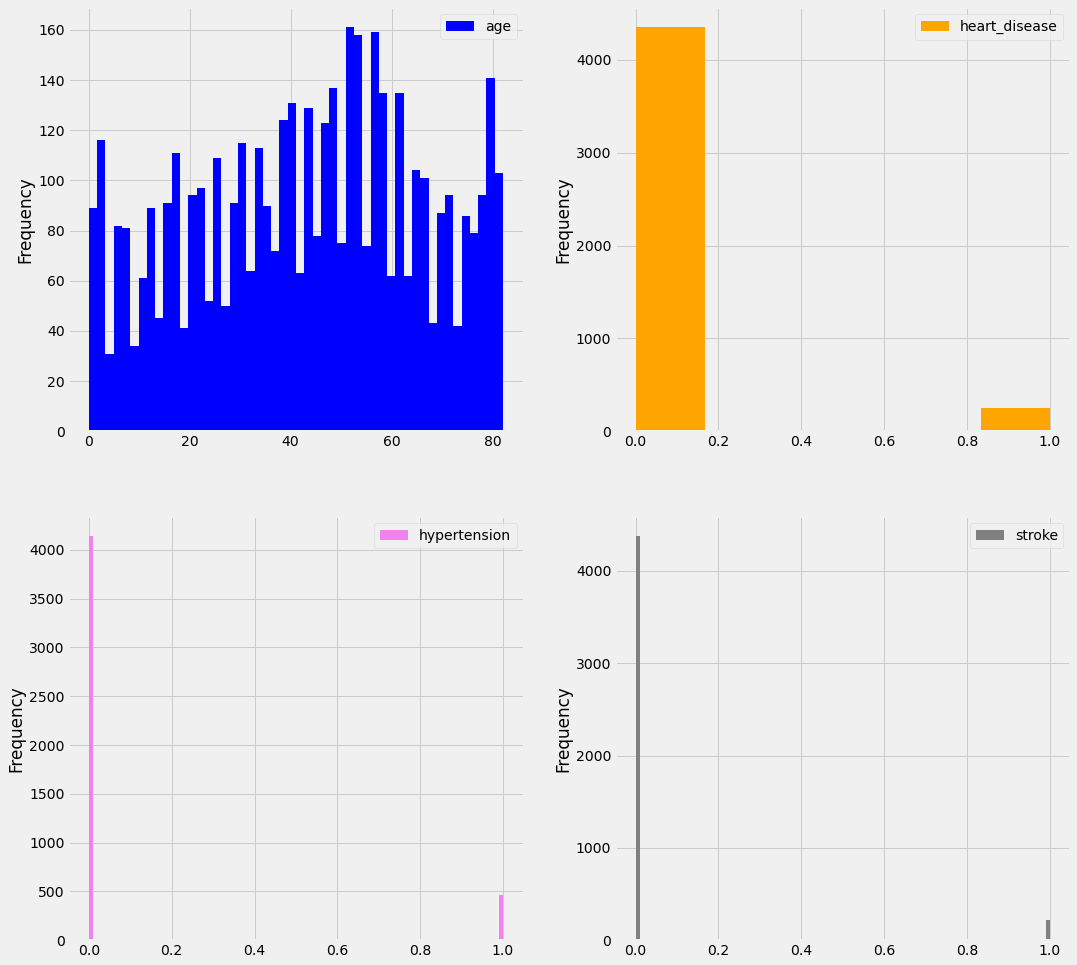

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
train.plot(kind="hist", y="age", bins=50,  color="blue", ax=axes[0][0])
train.plot(kind="hist", y="heart_disease", bins=6, color="orange", ax=axes[0][1])
train.plot(kind="hist", y="hypertension", bins=100, color="violet", ax=axes[1][0])
train.plot(kind="hist", y="stroke", bins=100, color="grey", ax=axes[1][1])

plt.show()

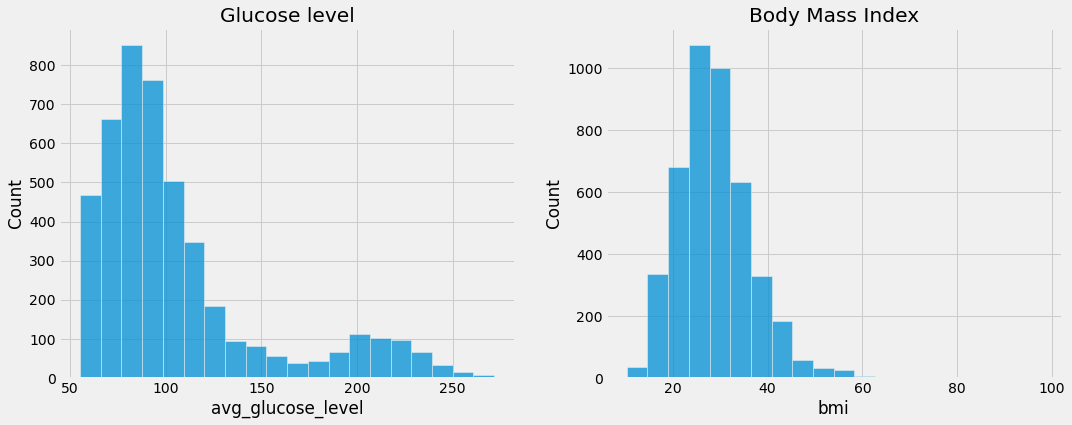

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('Glucose level')
ax2.set_title('Body Mass Index')
sns.histplot(train['avg_glucose_level'], bins=20, ax=ax1)
sns.histplot(train['bmi'], bins=20, ax=ax2)

plt.show()

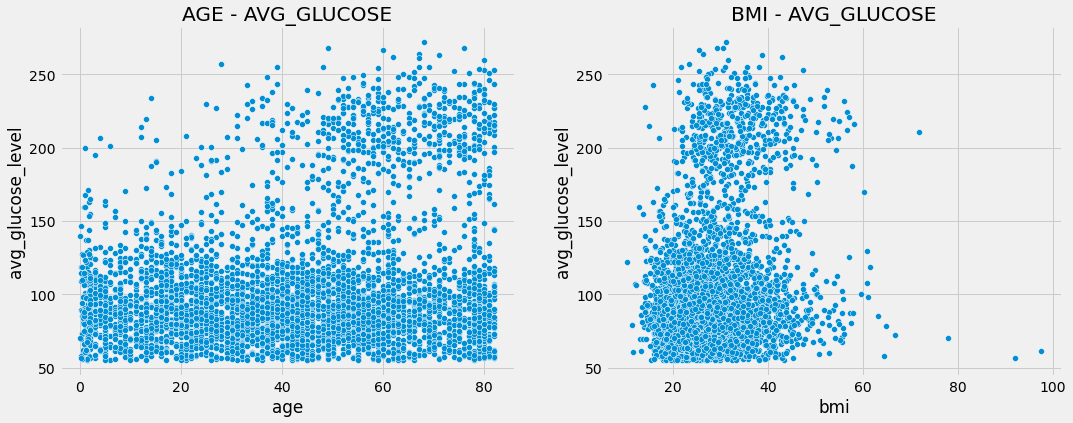

In [11]:
#visualizzo graficamente la relazione tra age e avg_glucose_level e bmi e avg_glucose_level
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('AGE - AVG_GLUCOSE')
sns.scatterplot(x='age', y='avg_glucose_level', data=train, ax=ax1)

ax2.set_title('BMI - AVG_GLUCOSE')
sns.scatterplot(x='bmi', y='avg_glucose_level', data=train, ax=ax2)
plt.show()

### Considerazioni sui grafici scatter appena plottati: 

* Nel primo grafico è possibile notare che il valore di <code>avg_glucose_value</code> è inferiore per la popolazione più giovane 

* Dai grafici sopra riportati non posso evidenziare alcuna relazione fra <code>bmi</code> e <code>avg_glucose_level</code> in quanto sembra non avere un andamento direttamente correlato alla massa corporea

/Users/mariofocaccio/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mariofocaccio/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


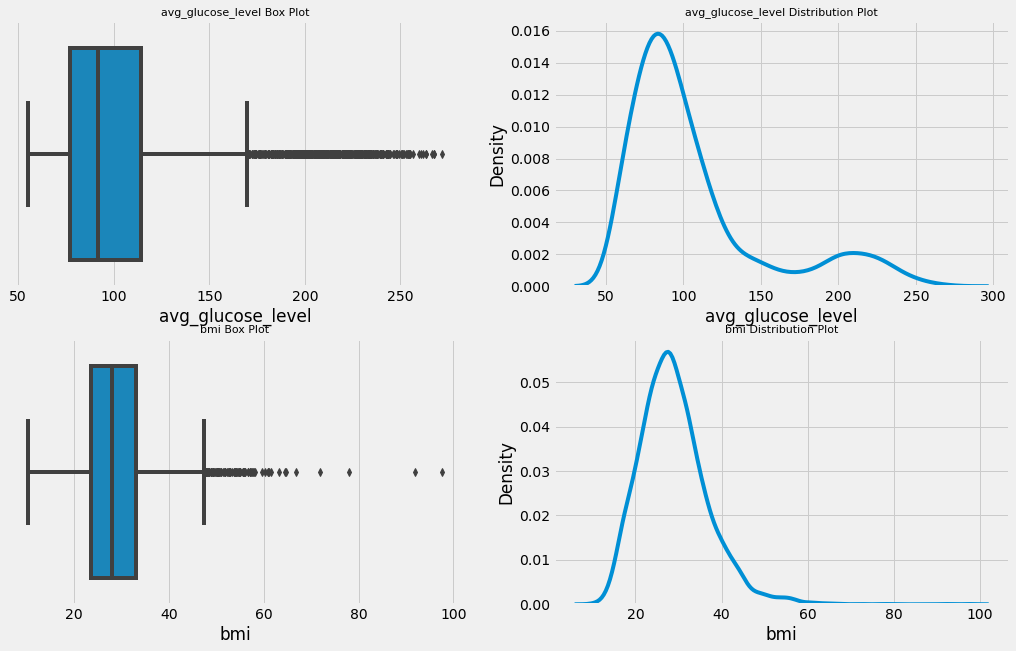

In [12]:
fig,axes = plt.subplots(2,2,figsize=(16,10))
sns.boxplot(train['avg_glucose_level'],ax=axes[0,0]).set_title('avg_glucose_level Box Plot',fontsize=11)
sns.kdeplot(train['avg_glucose_level'],ax=axes[0,1]).set_title('avg_glucose_level Distribution Plot',fontsize=11)

sns.boxplot(train['bmi'],ax=axes[1,0]).set_title('bmi Box Plot',fontsize=11)
sns.kdeplot(train['bmi'],ax=axes[1,1]).set_title('bmi Distribution Plot',fontsize=11)
plt.show()

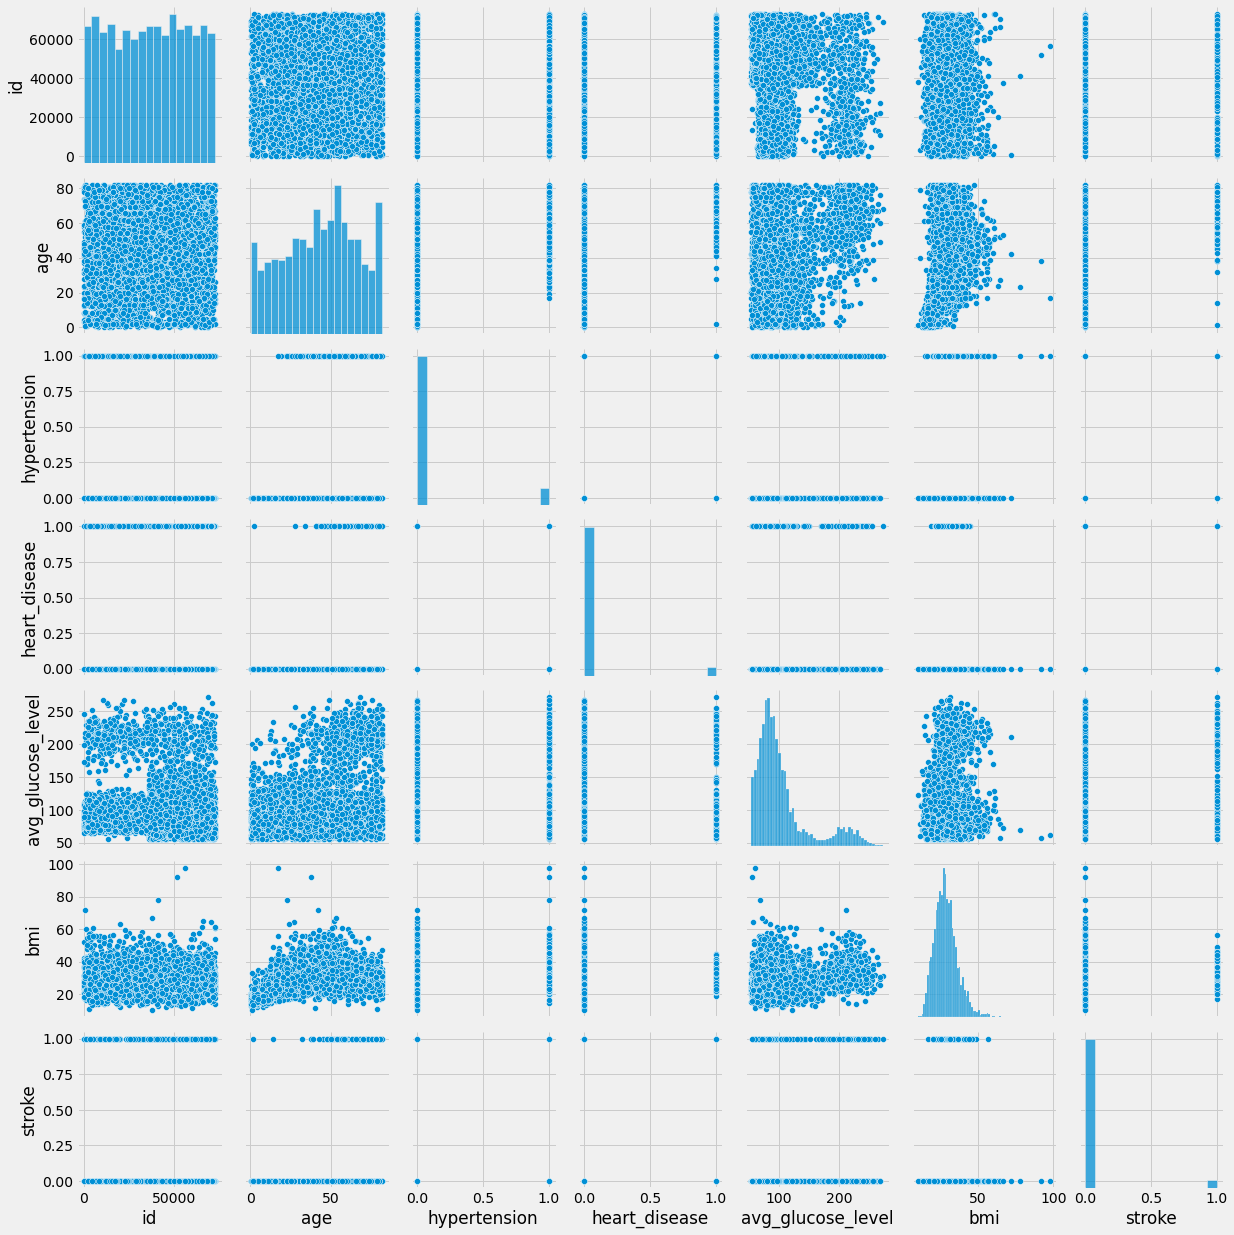

In [13]:
#chiedo di plottare una grafica di tutte le caratteristiche 
# sia su x che y per vedere se esiste qualche correlazione fra queste

sns.pairplot(train)
plt.show()

In [14]:
# Chiedo quale sia lo smoking status del dataset in forma numerica

print(train['smoking_status'].value_counts())

never smoked       1700
Unknown            1399
formerly smoked     798
smokes              701
Name: smoking_status, dtype: int64


Mi accorgo che una grande percentuale di elementi del dataset non ha un valore stabilito nel campo smoking_status

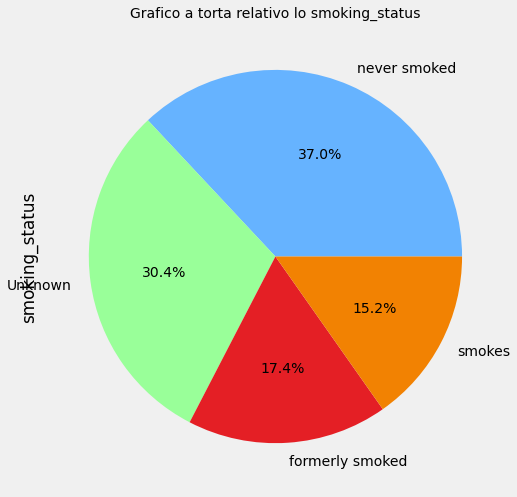

In [15]:
#Visualizzo graficamente qual è la percentuale di fumatori rispetto l'intera popolazione

plt.figure(figsize=(8,8))
train['smoking_status'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99','#e41f25','#f28202'])
plt.title("Grafico a torta relativo lo smoking_status", fontdict={'fontsize': 14})
plt.show()

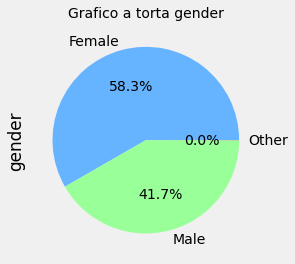

In [16]:
#Visualizzo graficamente qual è la percentuale di umoni, donne e other

plt.figure(figsize=(4,4))
train['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99','#e41f25'])
plt.title("Grafico a torta gender", fontdict={'fontsize': 14})
plt.show()

In [17]:
#Chiedo quale sia il numero di soggetti con ictus == 1 e di cui non abbiamo valore BMI
train[train['bmi'].isna() & train['stroke']==1].count()

id                   38
gender               38
age                  38
hypertension         38
heart_disease        38
ever_married         38
work_type            38
Residence_type       38
avg_glucose_level    38
bmi                   0
smoking_status       38
stroke               38
dtype: int64

In [18]:
#Chiedo quale sia il numero di soggetti con smoking_status = Unknown e di cui sappiamo per certo che stroke==1
train[train['smoking_status'].str.contains(r'Unknown') & train['stroke']==1].count()

id                   42
gender               42
age                  42
hypertension         42
heart_disease        42
ever_married         42
work_type            42
Residence_type       42
avg_glucose_level    42
bmi                  25
smoking_status       42
stroke               42
dtype: int64

In [19]:
#Chiedo quale sia il numero di soggetti con smoking_status = Unknown e di cui sappiamo per certo che hypertension==1
train[train['smoking_status'].str.contains(r'Unknown') & train['hypertension']==1].count()

id                   46
gender               46
age                  46
hypertension         46
heart_disease        46
ever_married         46
work_type            46
Residence_type       46
avg_glucose_level    46
bmi                  38
smoking_status       46
stroke               46
dtype: int64

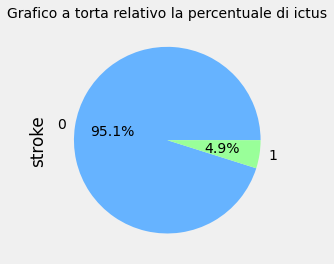

In [20]:
#Chiedo quale sia la percentuale di individui con ictus diagnosticato
#rispetto tutta la popolazione del dataset di training

plt.figure(figsize=(4,4))
train['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99'])
plt.title("Grafico a torta relativo la percentuale di ictus", fontdict={'fontsize': 14})
plt.show()

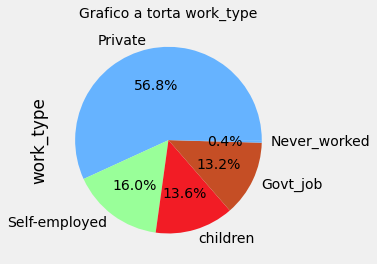

In [21]:
#Visualizzo graficamente le statistiche sul lavoro della popolazione del dataset

plt.figure(figsize=(4,4))
train['work_type'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99','#f21c25','#c54e25'])
plt.title("Grafico a torta work_type", fontdict={'fontsize': 14})
plt.show()

Adesso cerco una correlazione fra tutte le persone che hanno un ictus conclamato e le colonne 'ever_married' e 'work_type' per stabilire se ci può essere qualche correlazione

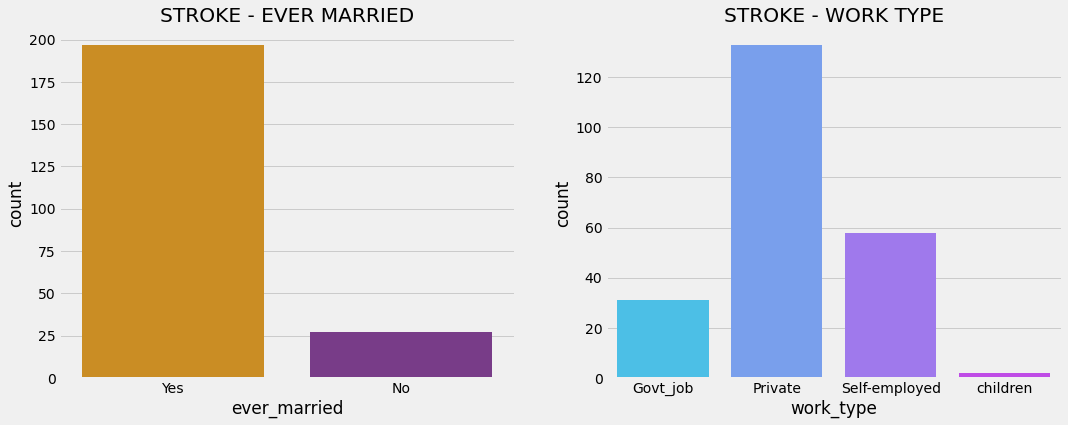

In [22]:
#visualizzo graficamente la relazione tra ictus conclamato e matrimonio e work_type
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
ictus=train.loc[train['stroke']==1]
ax1.set_title('STROKE - EVER MARRIED')
sns.countplot(data=ictus ,x='ever_married',palette='CMRmap_r', ax=ax1);

ax2.set_title('STROKE - WORK TYPE')
sns.countplot(data=ictus, x='work_type', palette='cool', ax=ax2)
plt.show()

Dagli ultimi grafici possiamo notare come la maggior parte delle persone affette da ictus presenti nel nostro database sono sposate <code>(married=yes)</code> e lavorano nel settore privato <code>(work_type=private)</code>.

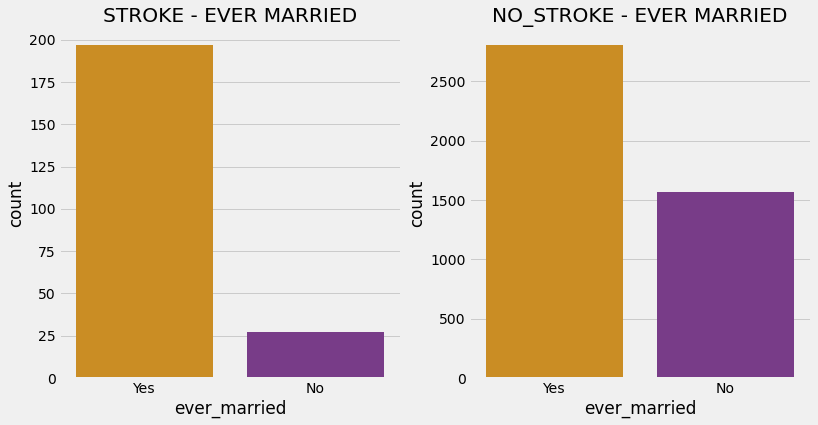

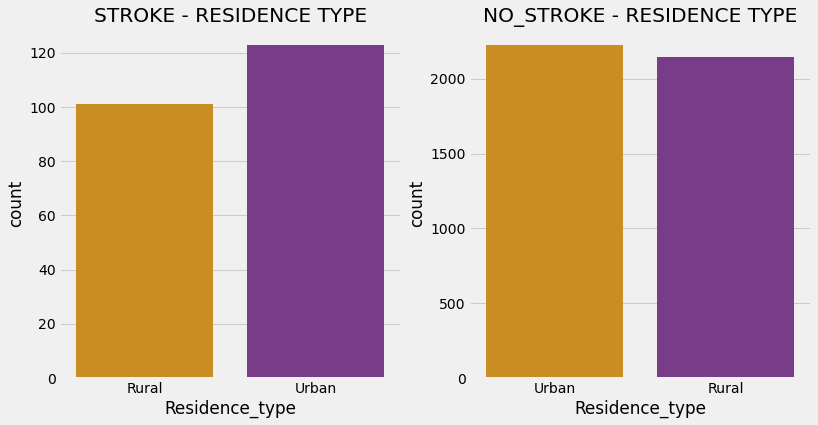

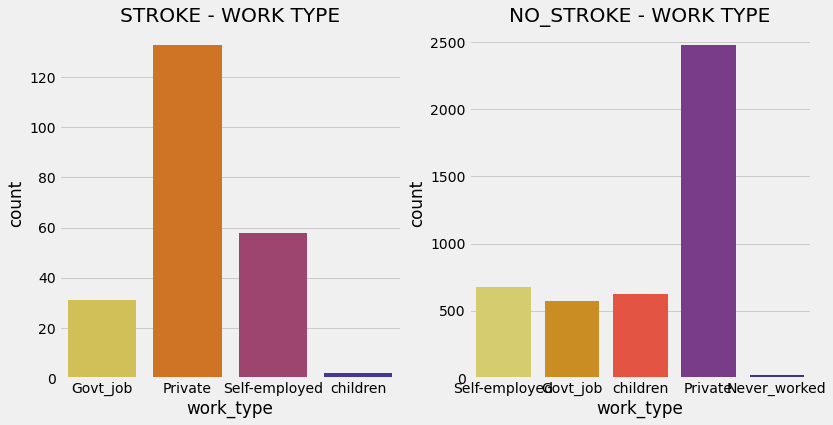

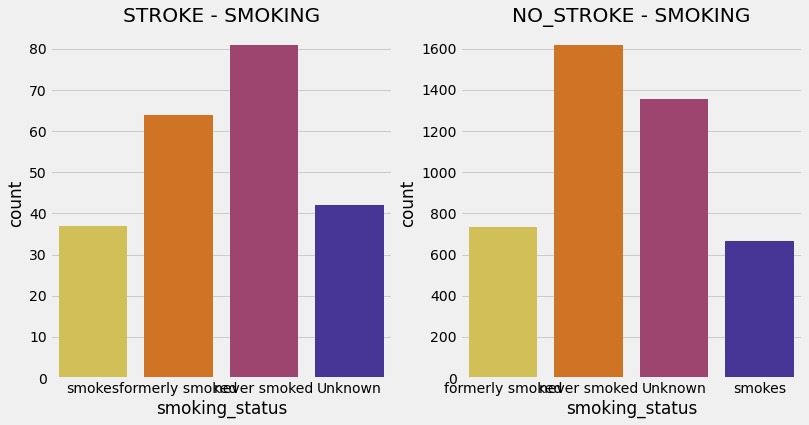

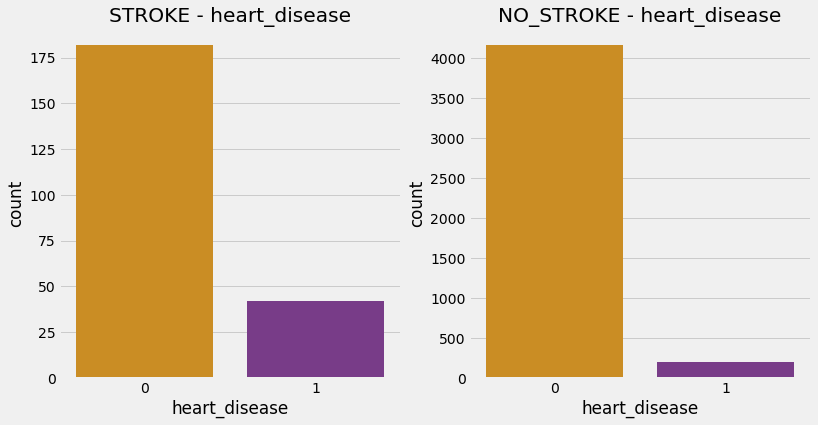

In [23]:
#Visualizzo graficamente la relazione tra i dati di stroke e no_stroke 

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))

ictus=train.loc[train['stroke']==1]
no_ictus=train.loc[train['stroke']==0]

ax1.set_title('STROKE - EVER MARRIED')
sns.countplot(data=ictus ,x='ever_married',palette='CMRmap_r', ax=ax1)

ax2.set_title('NO_STROKE - EVER MARRIED')
sns.countplot(data=no_ictus ,x='ever_married',palette='CMRmap_r' , ax=ax2)

plt.show()

fig, (ax3,ax4) = plt.subplots(1,2, figsize=(12,6))

ax3.set_title('STROKE - RESIDENCE TYPE')
sns.countplot(data=ictus ,x='Residence_type',palette='CMRmap_r', ax=ax3)
ax4.set_title('NO_STROKE - RESIDENCE TYPE')
sns.countplot(data=no_ictus ,x='Residence_type',palette='CMRmap_r', ax=ax4)

plt.show()

fig, (ax5,ax6) = plt.subplots(1,2, figsize=(12,6))

ax5.set_title('STROKE - WORK TYPE')
sns.countplot(data=ictus ,x='work_type',palette='CMRmap_r', ax=ax5)
ax6.set_title('NO_STROKE - WORK TYPE')
sns.countplot(data=no_ictus ,x='work_type',palette='CMRmap_r', ax=ax6)

plt.show()

fig, (ax7,ax8) = plt.subplots(1,2, figsize=(12,6))

ax7.set_title('STROKE - SMOKING')
sns.countplot(data=ictus ,x='smoking_status',palette='CMRmap_r', ax=ax7)
ax8.set_title('NO_STROKE - SMOKING')
sns.countplot(data=no_ictus ,x='smoking_status',palette='CMRmap_r', ax=ax8)

plt.show()

fig, (ax9,ax10) = plt.subplots(1,2, figsize=(12,6))

ax9.set_title('STROKE - heart_disease')
sns.countplot(data=ictus ,x='heart_disease',palette='CMRmap_r', ax=ax9)
ax10.set_title('NO_STROKE - heart_disease')
sns.countplot(data=no_ictus ,x='heart_disease',palette='CMRmap_r', ax=ax10)

plt.show()

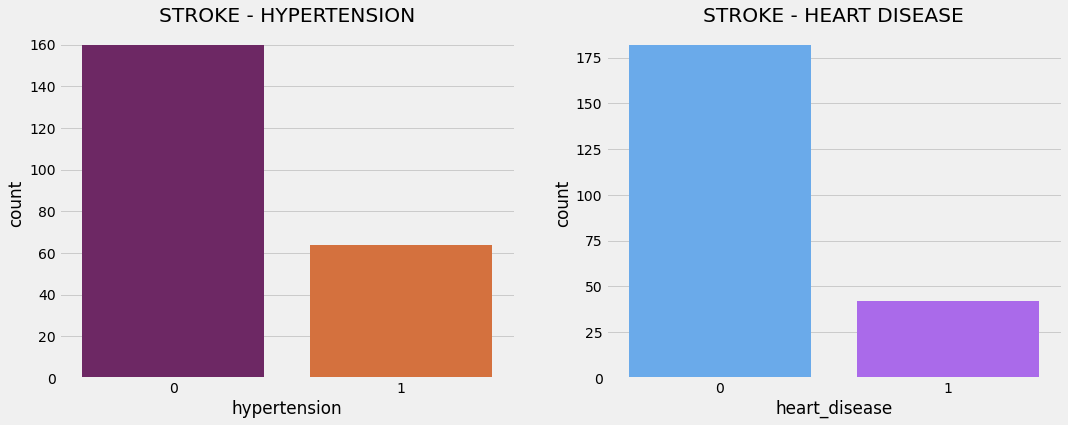

In [24]:
#visualizzo graficamente la relazione tra ictus conclamato e ipertensione e/o disfunzioni cardiache
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
ictus=train.loc[train['stroke']==1]
ax1.set_title('STROKE - HYPERTENSION')
sns.countplot(data=ictus ,x='hypertension',palette='inferno', ax=ax1);

ax2.set_title('STROKE - HEART DISEASE')
sns.countplot(data=ictus, x='heart_disease', palette='cool', ax=ax2)
plt.show()

In [25]:
#chiedo quanti sono gli id univoci nel dataset
train['id'].count()

4598

Dopo aver effettuato la nostra analisi statistica, sulla base dei grafici sopra riportati, possiamo evidenziare le seguenti criticità: 

* La campionatura di train in nostro possesso presenta una grande mole di dati provenienti da soggetti non affetti da **ictus** e quindi <code>stroke==0</code>
* La campionatura è composta da soggetti con un AVG_glucose_level che per il 75% è al di sotto del valore di 140: ciò non ci aiuterà a capire se esiste una correlazione stretta fra _diabete_ e rischio di _ictus_
* La maggior parte dei soggetti analizzati sostanzialmente è in buona salute perché non ci sono grandi casi di _ipertensione_ o _malattie cardio-vascolari_
* L'età della popolazione analizzata è molto variegata: l'età massima è di 82 anni e l'età media di 43. 

All'interno del data frame abbiamo potuto notare come i valori di '<code>gender</code>', '<code>ever_married</code>', '<code>work_type</code>', '<code>Residence_type</code>' e '<code>smoking_status</code>' sono <code>type: object</code>. 
Per effettuare un'analisi ed una corretta classificazione di questi dati, avremo necessità di "_convertirli_" associando loro delle _etichette_ per l'identificazione in forma numerica. 

Con le ultime righe (sopra riportate) abbiamo scoperto quanto segue: 
* Non abbiamo dati relativi allo smoking_status per un totale di 1399 soggetti 
* Di questi 1399 soggetti 42 hanno avuto un ictus e 46 soffrono di ipertensione
* Fra tutti i soggetti con ictus conclamato (224 totali) di 38 non abbiamo dati relativi il BMI 

Inoltre è chiaramente visibile il fatto che il numero di righe presenti nel dataframe corrisponde al numero univoco di id. Da questo dato posso capire che non ci sono **righe duplicate** e pertanto la colonna **id** può essere omessa dalle nostre elaborazioni. Successivamente applicheremo un _drop_ per farlo. 

<AxesSubplot:>

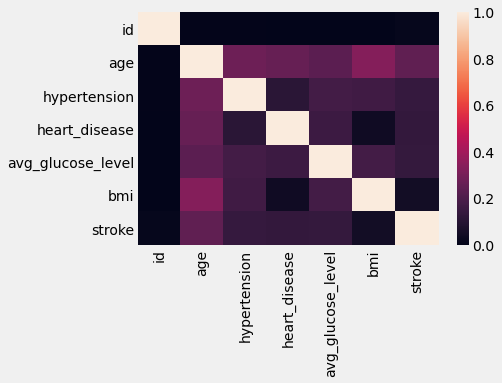

In [26]:
# Chiedo di stampare a video una matrice di confusione per determinare
# la correlazione delle features
sns.heatmap(train.corr())

# Step 3
Effettuare una opportuna fase di Data Cleaning e Data Integration ed
eventualmente effettuare nuovamente l’analisi statistica al punto precedente.

Dai dati precedenti ci siamo accorti che **38** righe non presentano alcun valore corrispondente nella riga BMI nonostante abbia un caso conclamato di ictus. 

Opero pertanto una sostituzione di tutti i valori mancanti nella colonna <code>BMI</code> inserendo i valori di mean (media) di BMI

In [27]:
# Chiedo quale sia la media dei valori del dataset
train.mean()

id                   36510.873858
age                     43.244750
hypertension             0.100043
heart_disease            0.053936
avg_glucose_level      106.229043
bmi                     28.894878
stroke                   0.048717
dtype: float64

In [28]:
# Sostituisco tutti gli attributi di BMI mancanti con i valori mean richiedendo di arrotondare all'unità
train['bmi'].fillna(np.round(train['bmi'].mean(), 1), inplace = True)

# Chiedo quindi se sono rimaste righe con attributo stroke ==1 e bmi NaN (dovrei ottenere un df vuoto)
train[train['bmi'].isna() & train['stroke'] == 1]

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [29]:
#chiedo adesso quale sia la media di bmi per verificare che l'operazione non abbia inficiato la nostra media

train['bmi'].mean()

28.89508481948669

Nelle analisi precedenti ci siamo accorti che la colonna di attributi **'id'** ha lo stesso numero delle righe presenti nel dataset. 

Decido quindi di eliminare la colonna relativa gli _'id'_ e lo faccio tramite un **drop** come in SQL. 

In [30]:
train = train.drop(columns=['id'])

Inoltre, sempre dalle analisi precedenti si evince che nel dataset è presente una percentuale irrilevante di pazienti senza la dichiarazione del gender. Per non confondere il nostro lavoro è meglio eliminare questa piccola percentuale e non falsare il nostro algoritmo. Prima di tutto quantifico effettivamente quanti sono gli elementi di gender "Other" presenti nel mio dataframe. 

In [31]:
train.gender.map(lambda d: "Other" in d).sum()

1

In [32]:
train = train[train['gender'] != 'Other']

In [33]:
# Verifico quindi che l'operazione sia andata a buon fine 
# e che le colonne siano diventate 4597 invece di 4598

train.count()

gender               4597
age                  4597
hypertension         4597
heart_disease        4597
ever_married         4597
work_type            4597
Residence_type       4597
avg_glucose_level    4597
bmi                  4597
smoking_status       4597
stroke               4597
dtype: int64

Plotto quindi graficamente la percentuale di suddivisione di genere, anche se intuitivamente possiamo capire che il risultato sarà lo stesso.

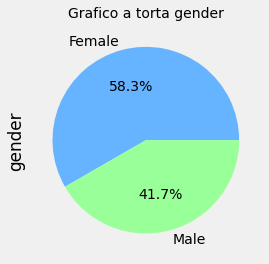

In [34]:
plt.figure(figsize=(4,4))
train['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99','#e41f25'])
plt.title("Grafico a torta gender", fontdict={'fontsize': 14})
plt.show()

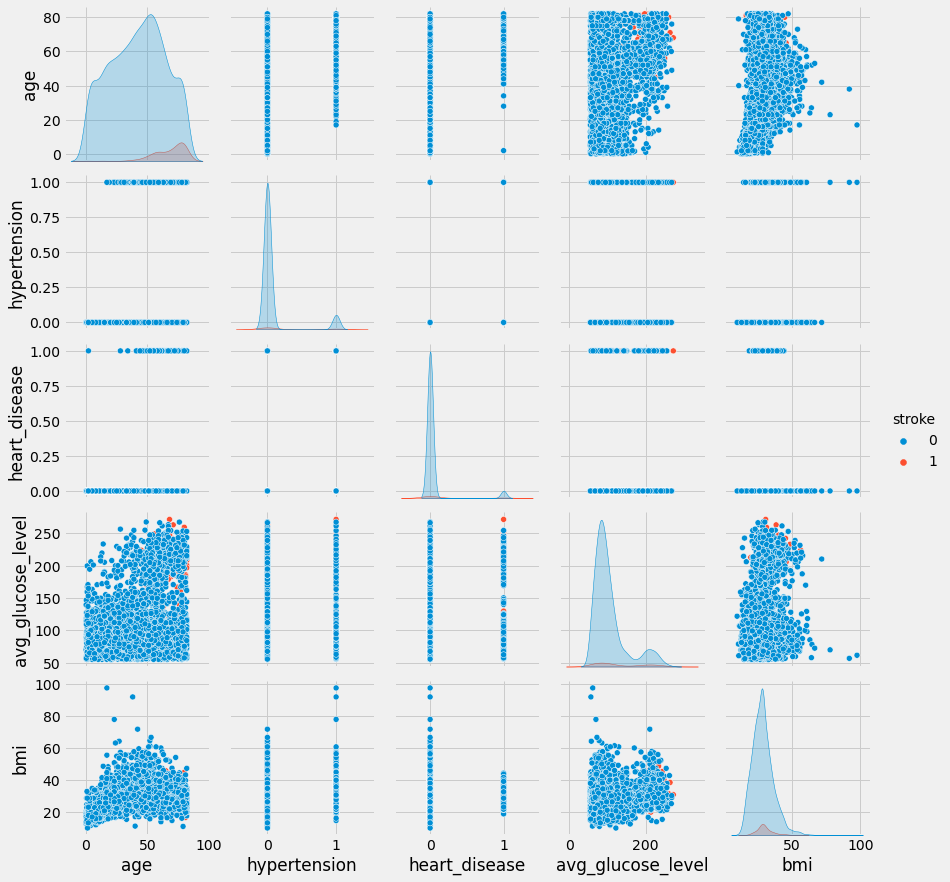

In [35]:
sns.pairplot(train, hue="stroke", height=2.5);

# Step 4
Effettuare, se opportuno, una fase di Data Transformation e/o Reduction (es.
in caso di feature nominali con numero di classi &gt; 2 effettuare un one-hot encoding o un label encoder). 

Prima di procedere alla fase di training e validazione dei nostri algoritmi, è necessario effettuare un **data preprocessing** al fine far interpretare correttamente alla nostra macchina i dati in imput. 

I valori espressi nelle colonne <code>'Residence_type'</code>, <code>'gender'</code>, <code>'work_type'</code>, <code>'smoking_status'</code> ed <code>'ever_married'</code> sono espressi in forma testuale e non come numero. Opero pertanto una trasformazione dei dati contenuti in queste colonne sostituendo un determinato valore.

Nel caso in cui le colonne presentino un numero di attributi unici < 2 procederò con un <code>label_encoder</code> mentre nel caso di più attributi unici come ad esempio <code>smoking_status</code> e <code>work_type</code> invece di utilizzare la funzione <code>OneHotEncoding</code> utilizzerò la funzione integrata in Pandas <code>pd.get_dummies()</code> per generare un numero di colonne pari al numero di attributi unici, riempiti con i valori booleani 0 e 1. 

Ho scelto questa strategia perché si tratta di un numero esiguo di attributi e ciò mi consentirà di dover normalizzare solo altre due colonne per avere un dataset definitivo. 

Inizio quindi sostituendo i dati relativi la colonna <code>'Residence_type'</code> ma prima importo tutte le librerie di encoding di cui avrò bisogno: 

In [36]:
train['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [37]:
# Associo in maniera univoca ad ogni categoria un numero 

# label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()

# Rural==0 & Urban==1
train['Residence_type']= train['Residence_type'].replace({'Urban': 1, 'Rural': 0})

#female==1 & male==0
train['gender']= train['gender'].replace({'Female': 1, 'Male': 0})

#Yes==1 & No==0
train['ever_married']= train['ever_married'].replace({'Yes': 1, 'No': 0})

#stampo le prime 3 voci del dataset modificato
train.head(3)

gender   age  hypertension  heart_disease  ever_married work_type  \
0       1  71.0             0              0             1  Govt_job   
1       0  70.0             1              0             1   Private   
2       0  80.0             0              1             1   Private   

   Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0               0             193.94  22.4           smokes       1  
1               0             242.52  45.5  formerly smoked       1  
2               0             105.92  32.5     never smoked       1

Per quanto concerne le colonne <code>'Work_type'</code> e <code>'smoking_status'</code> queste sono espresse in forma testuale ma non sono composte da due sole variabili. Possiamo riconoscere infatti diverse variabili per ciascuna colonna:  

In [38]:
train['smoking_status'].unique()

array(['smokes', 'formerly smoked', 'never smoked', 'Unknown'],
      dtype=object)

In [39]:
train['work_type'].unique()

array(['Govt_job', 'Private', 'Self-employed', 'children', 'Never_worked'],
      dtype=object)

Al fine di attribuire a ciascun elemento la giusta priorità, e per non confondere il nostro algoritmo con numeri troppo elevati (tipici del **Label Encoding** utilizzato in precedenza) scelgo di utilizzare la funzione get_dummies di Pandas creando opportunamente nuove colonne nel dataFrame _train_ (che denominerò **train_2**) per ogni attributo presente nella colonna <code>'work_type'</code> e <code>'smoking_status'</code>

In [40]:
nuovo_train = pd.get_dummies(train['work_type'], drop_first=False)
train = train.join(nuovo_train)
train=train.drop(columns=['work_type'])

fumatori = pd.get_dummies(train['smoking_status'], drop_first=False)
train = train.join(fumatori)
train=train.drop(columns=['smoking_status'])

train.head(3)

gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  71.0             0              0             1               0   
1       0  70.0             1              0             1               0   
2       0  80.0             0              1             1               0   

   avg_glucose_level   bmi  stroke  Govt_job  Never_worked  Private  \
0             193.94  22.4       1         1             0        0   
1             242.52  45.5       1         0             0        1   
2             105.92  32.5       1         0             0        1   

   Self-employed  children  Unknown  formerly smoked  never smoked  smokes  
0              0         0        0                0             0       1  
1              0         0        0                1             0       0  
2              0         0        0                0             1       0

Il valore 'Unknown', precedentemente appartenente alla colonna 'smoking_status', è stato opportunamente sostituito con valori 0 e 1 in tutte le righe corrispondenti tramite la funzione <code>get_dummies()</code> di Pandas laddove esistente nel dataset iniziale. 

Affinché il nostro algoritmo non sia influenzato da grandezze particolari, decido di normalizzare i valori numerici di <code>age</code>,<code>avg_glucose_level</code> e <code>bmi</code> in un intervallo che va da 0 a 1. 

Così facendo uniformo tutte le grandezze al range 0-1 e tutti i valori avranno più o meno lo stesso peso nelle decisioni prese dall'algoritmo. 

Provvedo dunque ad effettuare uno scaling dei dati utilizzando la funzione MinMaxScaler della libreria scikitlearn.preprocessing che ho importato nelle righe all'inizio dello 'Step 1'


In [41]:
scaler = MinMaxScaler()
train_def = train
train_def[['age','avg_glucose_level','bmi']]= scaler.fit_transform(train_def[['age','avg_glucose_level','bmi']])



In [42]:
# Verifico che all'interno del dataset siano presenti solo valori numerici
train_def.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4597 entries, 0 to 4597
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4597 non-null   int64  
 1   age                4597 non-null   float64
 2   hypertension       4597 non-null   int64  
 3   heart_disease      4597 non-null   int64  
 4   ever_married       4597 non-null   int64  
 5   Residence_type     4597 non-null   int64  
 6   avg_glucose_level  4597 non-null   float64
 7   bmi                4597 non-null   float64
 8   stroke             4597 non-null   int64  
 9   Govt_job           4597 non-null   uint8  
 10  Never_worked       4597 non-null   uint8  
 11  Private            4597 non-null   uint8  
 12  Self-employed      4597 non-null   uint8  
 13  children           4597 non-null   uint8  
 14  Unknown            4597 non-null   uint8  
 15  formerly smoked    4597 non-null   uint8  
 16  never smoked       4597 

In [43]:
# Chiedo di descrivere in generale il dataset normalizzato

train_def.describe()

gender          age  hypertension  heart_disease  ever_married  \
count  4597.000000  4597.000000   4597.000000    4597.000000   4597.000000   
mean      0.583206     0.526959      0.100065       0.053948      0.653687   
std       0.493082     0.276466      0.300120       0.225940      0.475846   
min       0.000000     0.000000      0.000000       0.000000      0.000000   
25%       0.000000     0.304199      0.000000       0.000000      0.000000   
50%       1.000000     0.548340      0.000000       0.000000      1.000000   
75%       1.000000     0.743652      0.000000       0.000000      1.000000   
max       1.000000     1.000000      1.000000       1.000000      1.000000   

       Residence_type  avg_glucose_level          bmi       stroke  \
count     4597.000000        4597.000000  4597.000000  4597.000000   
mean         0.511420           0.235901     0.213018     0.048727   
std          0.499924           0.209696     0.088470     0.215321   
min          0.000000           0.000000     0.000000     0.000000   
25%          0.000000           0.102068     0.154639     0.000000   
50%          1.000000           0.170067     0.207331     0.000000   
75%          1.000000           0.272966     0.257732     0.000000   
max          1.000000           1.000000     1.000000     1.000000   

          Govt_job  Never_worked      Private  Self-employed     children  \
count  4597.000000   4597.000000  4597.000000    4597.000000  4597.000000   
mean      0.131608      0.004351     0.568197       0.159887     0.135958   
std       0.338100      0.065823     0.495381       0.366541     0.342781   
min       0.000000      0.000000     0.000000       0.000000     0.000000   
25%       0.000000      0.000000     0.000000       0.000000     0.000000   
50%       0.000000      0.000000     1.000000       0.000000     0.000000   
75%       0.000000      0.000000     1.000000       0.000000     0.000000   
max       1.000000      1.000000     1.000000       1.000000     1.000000   

           Unknown  formerly smoked  never smoked       smokes  
count  4597.000000      4597.000000   4597.000000  4597.000000  
mean      0.304329         0.173374      0.369806     0.152491  
std       0.460173         0.378611      0.482805     0.359535  
min       0.000000         0.000000      0.000000     0.000000  
25%       0.000000         0.000000      0.000000     0.000000  
50%       0.000000         0.000000      0.000000     0.000000  
75%       1.000000         0.000000      1.000000     0.000000  
max       1.000000         1.000000      1.000000     1.000000

In [44]:
# Elimino la colonna Unknown relativa lo smoking_status in quanto è un dato inconsistente

train_def=train_def.drop(['Unknown'],1)

train_def.describe()

gender          age  hypertension  heart_disease  ever_married  \
count  4597.000000  4597.000000   4597.000000    4597.000000   4597.000000   
mean      0.583206     0.526959      0.100065       0.053948      0.653687   
std       0.493082     0.276466      0.300120       0.225940      0.475846   
min       0.000000     0.000000      0.000000       0.000000      0.000000   
25%       0.000000     0.304199      0.000000       0.000000      0.000000   
50%       1.000000     0.548340      0.000000       0.000000      1.000000   
75%       1.000000     0.743652      0.000000       0.000000      1.000000   
max       1.000000     1.000000      1.000000       1.000000      1.000000   

       Residence_type  avg_glucose_level          bmi       stroke  \
count     4597.000000        4597.000000  4597.000000  4597.000000   
mean         0.511420           0.235901     0.213018     0.048727   
std          0.499924           0.209696     0.088470     0.215321   
min          0.000000           0.000000     0.000000     0.000000   
25%          0.000000           0.102068     0.154639     0.000000   
50%          1.000000           0.170067     0.207331     0.000000   
75%          1.000000           0.272966     0.257732     0.000000   
max          1.000000           1.000000     1.000000     1.000000   

          Govt_job  Never_worked      Private  Self-employed     children  \
count  4597.000000   4597.000000  4597.000000    4597.000000  4597.000000   
mean      0.131608      0.004351     0.568197       0.159887     0.135958   
std       0.338100      0.065823     0.495381       0.366541     0.342781   
min       0.000000      0.000000     0.000000       0.000000     0.000000   
25%       0.000000      0.000000     0.000000       0.000000     0.000000   
50%       0.000000      0.000000     1.000000       0.000000     0.000000   
75%       0.000000      0.000000     1.000000       0.000000     0.000000   
max       1.000000      1.000000     1.000000       1.000000     1.000000   

       formerly smoked  never smoked       smokes  
count      4597.000000   4597.000000  4597.000000  
mean          0.173374      0.369806     0.152491  
std           0.378611      0.482805     0.359535  
min           0.000000      0.000000     0.000000  
25%           0.000000      0.000000     0.000000  
50%           0.000000      0.000000     0.000000  
75%           0.000000      1.000000     0.000000  
max           1.000000      1.000000     1.000000

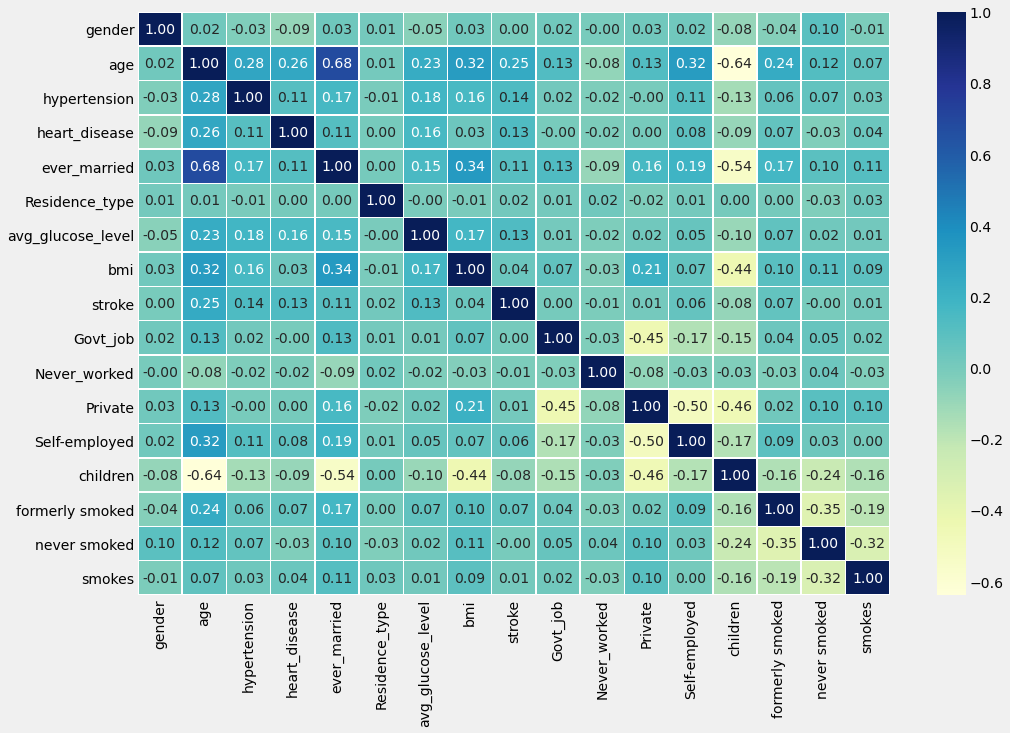

In [45]:
train_def.corr()
corr_matrix = train_def.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

# Step 5
Definire una baseline di algoritmi di classificazione dicotomica e una o più
modalità di convalida incrociata. Comparare i risultati ottenuti in modo consistente anche attraverso opportune visualizzazioni grafiche e commentare i risultati. Visualizzare per almeno uno dei modelli baseline:
* curve di convalida
* matrice di confusione, 
* confini decisionali 
* curva/e ROC;

Mappo inizialmente tutte le variabili indipendenti (<code>train_def.df.loc[:, train_def.columns != 'stroke']</code>) in un DF denominato x e le variabili target (<code>train_def['stroke']</code>) in un DF denominato y. 

In [46]:
x = train_def.loc[:, train_def.columns != 'stroke'].values
y = train_def['stroke'].values

In [47]:
# splitto i dati in dati di test e train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=True)

Utilizzerò e valuterò 8 algoritmi di classificazione: 

* Logistic Regression
* Random Forest
* Support Vector Machine (SVC)
* K Nearest Neighbour
* Naive Bayes
* KMeans Clustering
* Perceptron
* Multi-Layer Perceptron
* Gradient Boosting
* Decision Tree

Creo un dizionario in cui inserirò ciascun modello di classificazione scelto: 

In [48]:
algoritmi_scelti = dict()

algoritmi_scelti['Logreg'] = LogisticRegression(random_state=True)
algoritmi_scelti['Random Forest'] = RandomForestClassifier(n_estimators=100, random_state=42)
algoritmi_scelti['Support Vector Machine'] = SVC(kernel='rbf',probability=True)
algoritmi_scelti['kNN'] = KNeighborsClassifier(n_neighbors=14)
algoritmi_scelti['Naive Bayes'] = GaussianNB()
algoritmi_scelti['KMeans'] = KMeans(n_clusters=2, n_init=100, random_state=True)
algoritmi_scelti['Perceptron']= Perceptron(class_weight="balanced")
algoritmi_scelti['MLPCP']= MLPClassifier(hidden_layer_sizes=(14,100), activation = 'relu',solver='adam',random_state=True, max_iter=900, learning_rate_init=0.01, early_stopping=True)
algoritmi_scelti['Gradient Boost']=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=True)
algoritmi_scelti['DecisionTree']= DecisionTreeClassifier(criterion='entropy',splitter='random',class_weight='balanced', random_state=42)


Attraverso un ciclo for per ciascuna voce presente nel dizionario <code>algoritmi_scelti</code> (ossia ogni algoritmo di classificazione) fornisco in input i dati per l'apprendimento <code>x_train</code> e <code>y_train</code>

Chiedo dunque che venga stampata a video, al termine delle operazioni di fitting, la dicitura 'operazioni completate'

In [49]:
for algoritmo in algoritmi_scelti:
    
    algoritmi_scelti[algoritmo].fit(x_train, y_train)
    print(algoritmo + " : operazioni di fitting completate.")

Logreg : operazioni di fitting completate.
Random Forest : operazioni di fitting completate.
Support Vector Machine : operazioni di fitting completate.
kNN : operazioni di fitting completate.
Naive Bayes : operazioni di fitting completate.
KMeans : operazioni di fitting completate.
Perceptron : operazioni di fitting completate.
MLPCP : operazioni di fitting completate.
Gradient Boost : operazioni di fitting completate.
DecisionTree : operazioni di fitting completate.


Sfruttando la libreria di ScikitLearn chiedo, per ogni algoritmo di classificazione scelto, di stampare a video un <code>classification_report</code> (report di classificazione), una matrice di confusione e le curve ROC.

---------------------------------------------Logreg---------------------------------------------


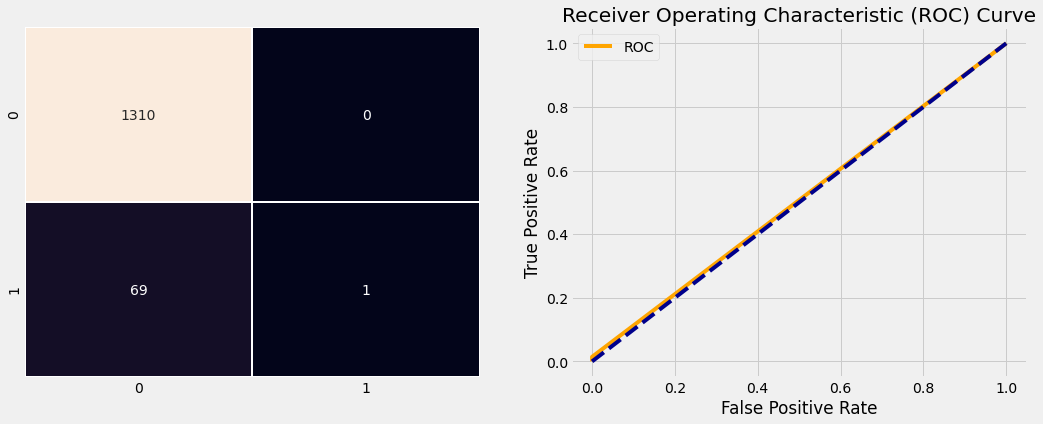

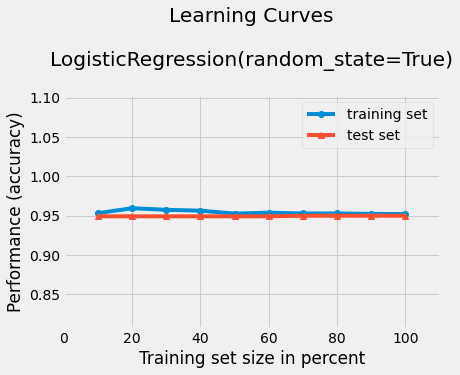


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1310
           1       1.00      0.01      0.03        70

    accuracy                           0.95      1380
   macro avg       0.97      0.51      0.50      1380
weighted avg       0.95      0.95      0.93      1380

---------------------------------------------Random Forest---------------------------------------------


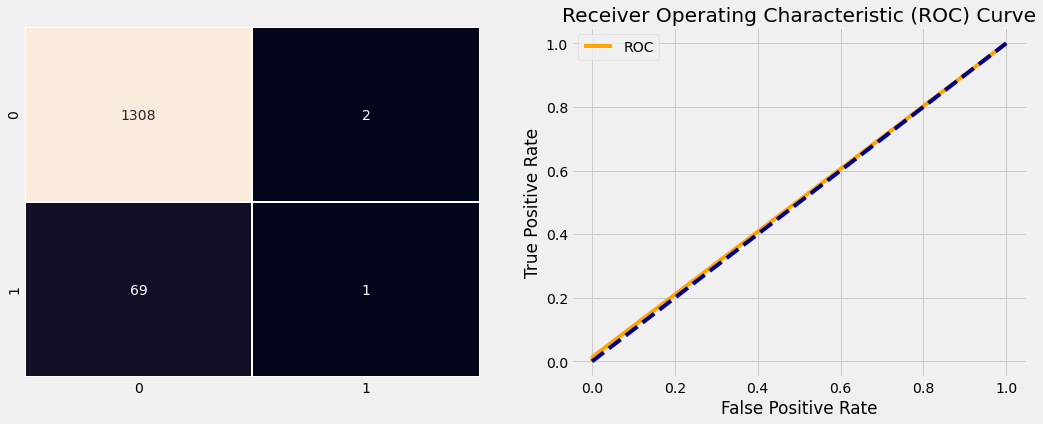

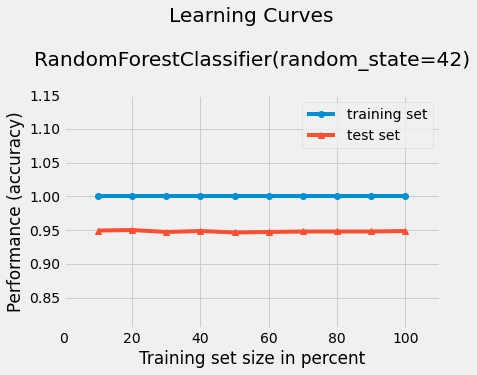


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1310
           1       0.33      0.01      0.03        70

    accuracy                           0.95      1380
   macro avg       0.64      0.51      0.50      1380
weighted avg       0.92      0.95      0.93      1380

---------------------------------------------Support Vector Machine---------------------------------------------


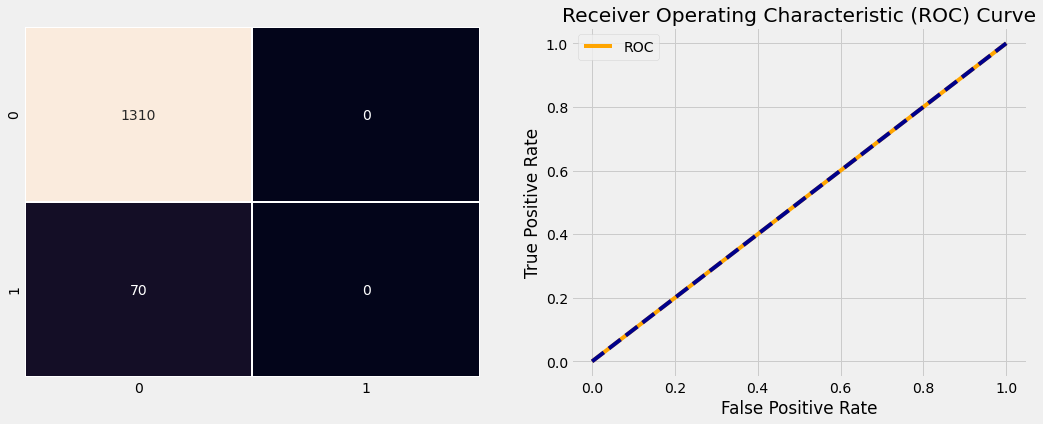

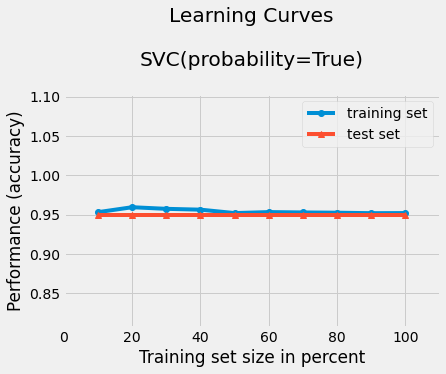


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1310
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1380
   macro avg       0.47      0.50      0.49      1380
weighted avg       0.90      0.95      0.92      1380

---------------------------------------------kNN---------------------------------------------


/Users/mariofocaccio/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariofocaccio/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariofocaccio/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

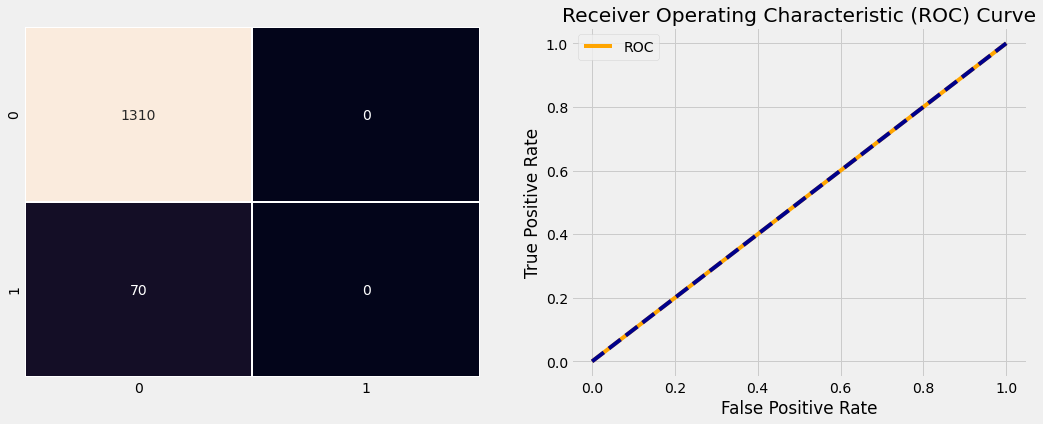

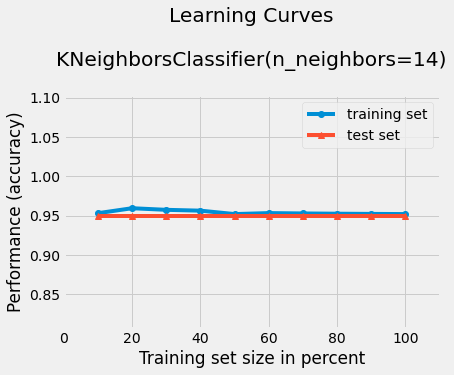


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1310
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1380
   macro avg       0.47      0.50      0.49      1380
weighted avg       0.90      0.95      0.92      1380

---------------------------------------------Naive Bayes---------------------------------------------


/Users/mariofocaccio/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariofocaccio/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariofocaccio/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

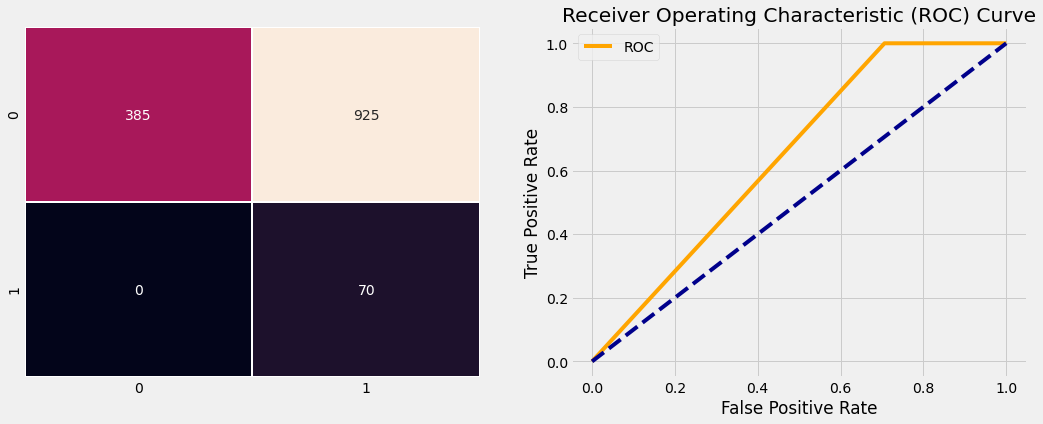

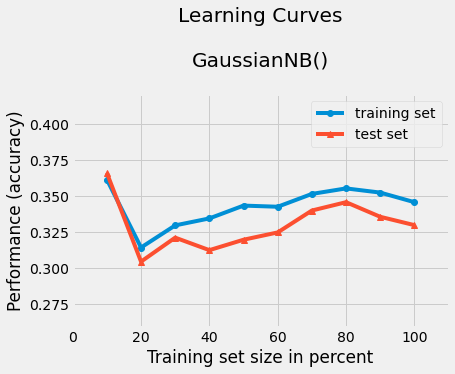


  Classification Report 
 
              precision    recall  f1-score   support

           0       1.00      0.29      0.45      1310
           1       0.07      1.00      0.13        70

    accuracy                           0.33      1380
   macro avg       0.54      0.65      0.29      1380
weighted avg       0.95      0.33      0.44      1380

---------------------------------------------KMeans---------------------------------------------


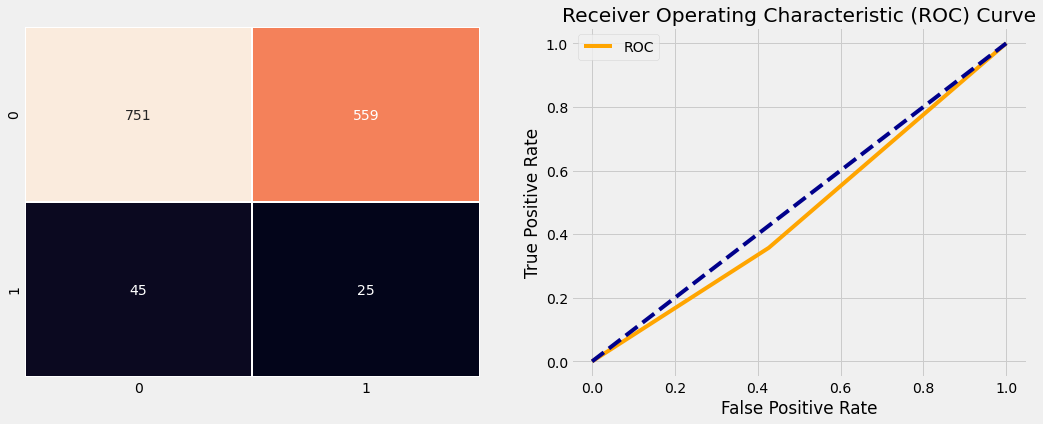

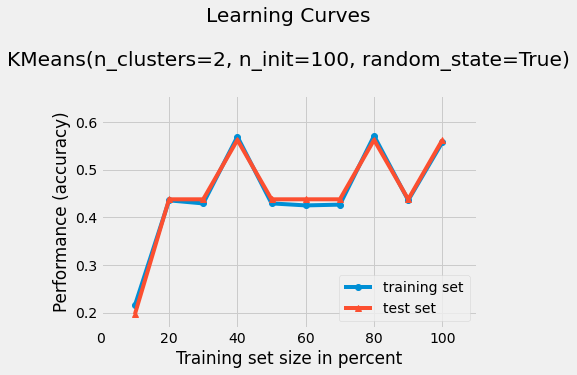


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1310
           1       0.04      0.36      0.08        70

    accuracy                           0.56      1380
   macro avg       0.49      0.47      0.39      1380
weighted avg       0.90      0.56      0.68      1380

---------------------------------------------Perceptron---------------------------------------------


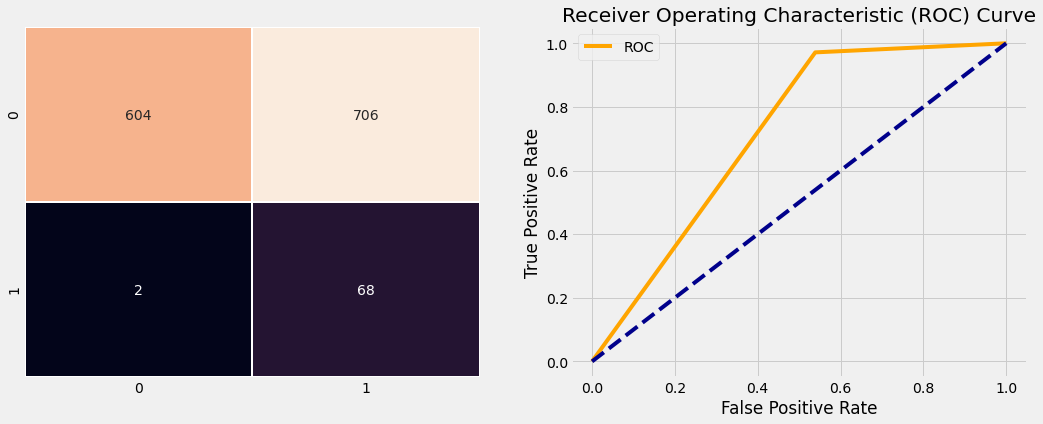

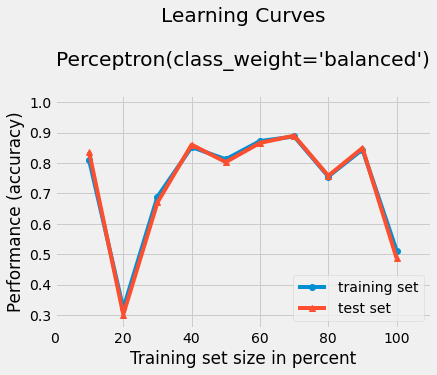


  Classification Report 
 
              precision    recall  f1-score   support

           0       1.00      0.46      0.63      1310
           1       0.09      0.97      0.16        70

    accuracy                           0.49      1380
   macro avg       0.54      0.72      0.40      1380
weighted avg       0.95      0.49      0.61      1380

---------------------------------------------MLPCP---------------------------------------------


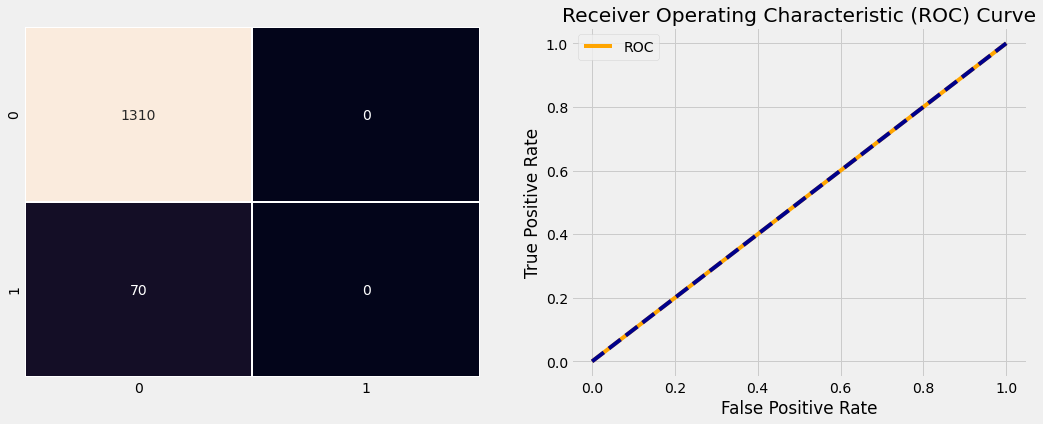

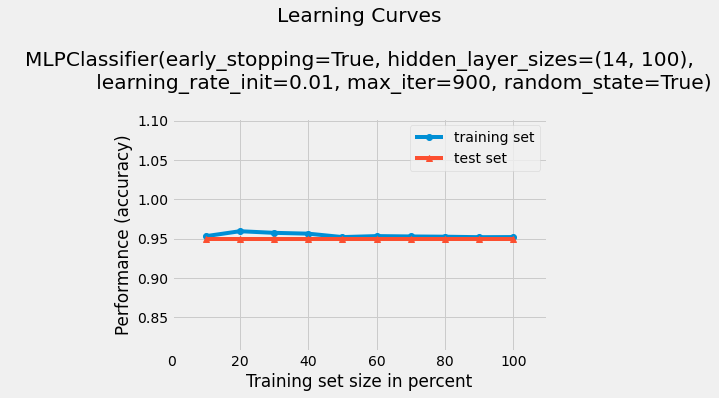


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1310
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1380
   macro avg       0.47      0.50      0.49      1380
weighted avg       0.90      0.95      0.92      1380

---------------------------------------------Gradient Boost---------------------------------------------


/Users/mariofocaccio/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariofocaccio/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariofocaccio/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

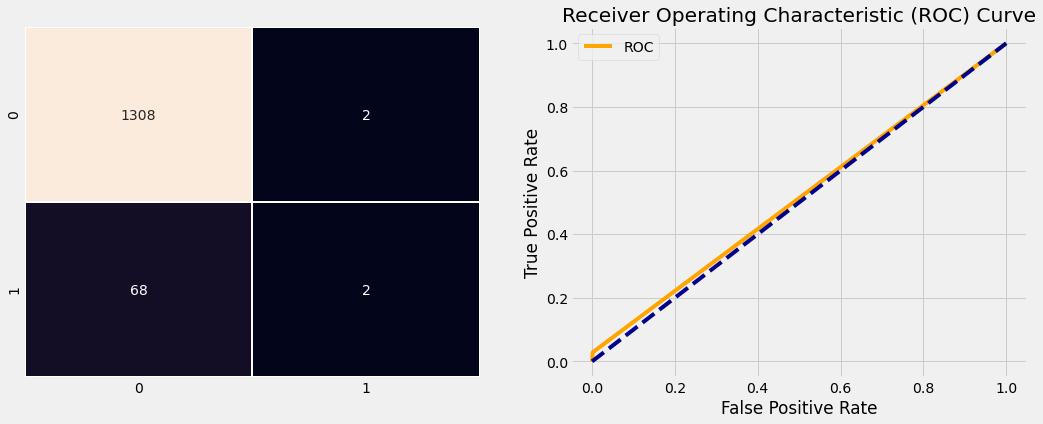

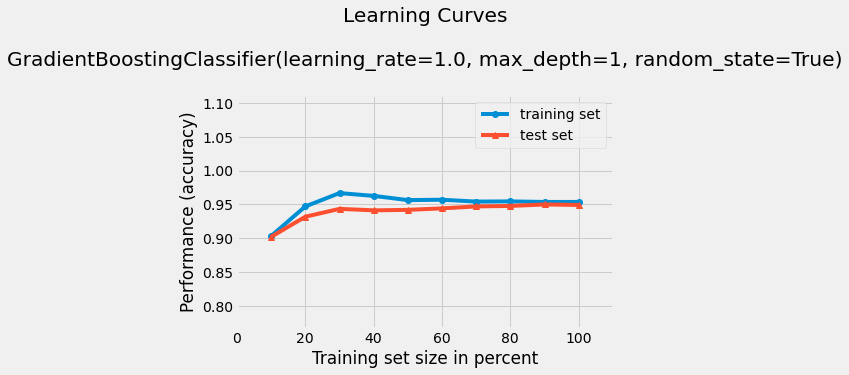


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1310
           1       0.50      0.03      0.05        70

    accuracy                           0.95      1380
   macro avg       0.73      0.51      0.51      1380
weighted avg       0.93      0.95      0.93      1380

---------------------------------------------DecisionTree---------------------------------------------


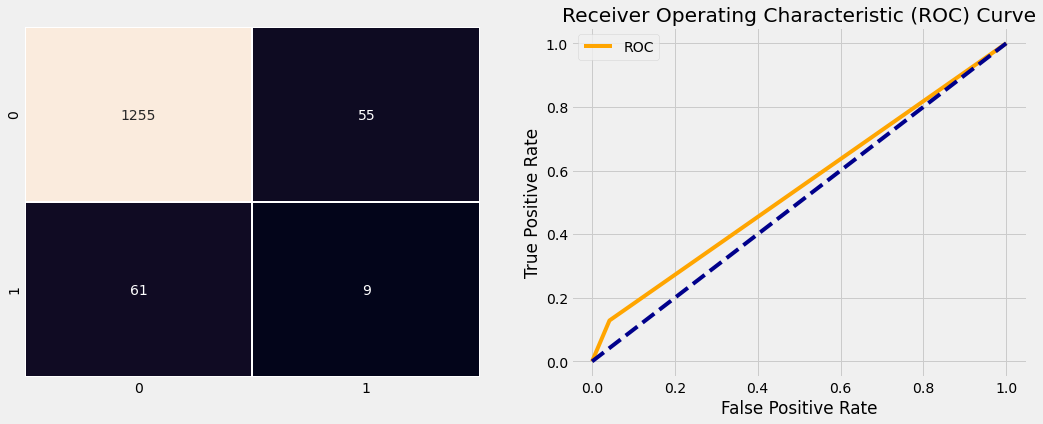

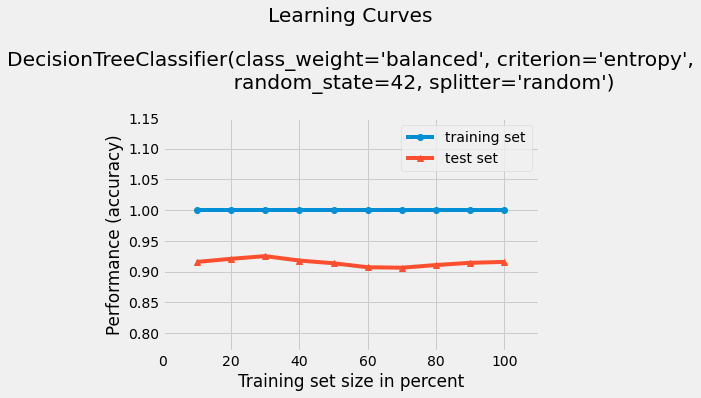


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1310
           1       0.14      0.13      0.13        70

    accuracy                           0.92      1380
   macro avg       0.55      0.54      0.55      1380
weighted avg       0.91      0.92      0.91      1380



In [50]:
#Di seguito quindi plotto una matrice di confusione ed un grafico 
# di curve ROC (Receiver Operating Characteristics) per ciascun algoritmo
# di classificazione scelto

        
for x in algoritmi_scelti:
    
    print('-'*45+x+'-'*45)
    algoritmo = algoritmi_scelti[x]
    y_pred = algoritmo.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    cf_matrix = confusion_matrix(**arg_test)    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    def plot_roc_curve(fpr, tpr):
        plt.plot(fpr, tpr, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        
    fig, axs = plt.subplots(ncols=2, figsize=(16,6))
    sns.heatmap(cf_matrix, annot=True, cbar=False, ax=axs[0], linewidths=1, fmt='g')
    plot_roc_curve(fpr, tpr) 
    plt.show()
    plot_learning_curves(x_train, y_train, x_test, y_test, algoritmo, scoring='accuracy')
    plt.show()
    print('\n  Classification Report \n ')
    print(classification_report(**arg_test))

### Alcune considerazioni sul report di classificazione appena visto

* Il parametro <code>recall</code> indica "quanti di questa classe trovi sull'intero numero di elementi di questa classe". Un basso numero di <code>recall</code> per l'attributo <code>stroke==1</code> indica la presenza di numerosi _Falsi Positivi_. 
* <code>Precision</code> infica quanti elementi sono classificati correttamente in quella classe
* Il punteggio <code>f1-score</code> è la media armonica tra precisione e richiamo
* <code>Support</code> è il numero di occorrenze della classe data nel set di dati (quindi abbiamo 1310 della classe 0 e 70 della classe 1, che non è proprio un set di dati bilanciato su cui fare training).

In [51]:
# Chiedo di stampare a video un riepilogo sull'accuratezza delle previsioni di 
# ciascun algoritmo 

print('Riepilogo Accuracy Score\n\n')
for i in algoritmi_scelti:
    model = algoritmi_scelti[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))

Riepilogo Accuracy Score


Logreg Model:  0.95
Random Forest Model:  0.9486
Support Vector Machine Model:  0.9493
kNN Model:  0.9493
Naive Bayes Model:  0.3297
KMeans Model:  0.5623
Perceptron Model:  0.487
MLPCP Model:  0.9493
Gradient Boost Model:  0.9493
DecisionTree Model:  0.9159


Il riepilogo sull'accuratezza di ciascun algoritmo non è sufficiente, è anche importante considerare il tipo di errore e il valore di richiamo (recall) di ciascun modello. 

I modelli con un punteggio di accuratezza di 0,95 in questo caso hanno un alto numero di falsi negativi e falsi positivi, come mostrato nella matrice di confusione di scikilearn. 

Nel nostro studio sulla previsione dell'ictus, vogliamo evitare questo tipo di errore in quanto significa che non riusciamo a identificare i soggetti che hanno ictus e li consideriamo invece liberi da ictus. 

Per definire il grado di accuratezza o l’efficacia di un qualsiasi modello di machine learning è necessario eseguire una o più valutazioni sugli errori che si ottengono nelle previsioni.

In genere, dopo l’allenamento viene effettuata una stima dell’errore per il modello, meglio nota come **valutazione dei residui**. In questo processo, viene eseguita una stima numerica della differenza nelle risposte _previste_ e originali, chiamata anche errore di addestramento (_training error_).

Tuttavia, questo ci dà solo un’idea di quanto bene il nostro modello si applica ai dati utilizzati per addestrarlo.

Quindi, il problema con questa tecnica di valutazione è che non fornisce un’indicazione di come il modello di apprendimento si generalizzerà a un set di dati indipendente / invisibile, ossia su dati che non ha già visto.

Per ovviare a questo si può utilizzare la **cross validation**, o **convalida incrociata**.

La cross validation è un metodo statistico utilizzato per stimare l’abilità dei modelli di apprendimento.

**Il concetto fondamentale su cui si fonda è quello di non utilizzare l’intero set di dati durante l’addestramento di un modello:** una parte di essi vengono rimossi prima dell’inizio dell’allenamento. Al termine della formazione, i dati rimossi possono essere utilizzati per testare le prestazioni del modello appreso su ”nuovi” dati.

In altre parole, la convalida del modello viene definita dal processo in cui un modello addestrato viene valutato con un set di dati di test. Il set di dati di test è una parte separata dello stesso set di dati da cui deriva il set di training. Lo scopo principale dell’utilizzo del set di dati di test è testare la capacità di generalizzazione di un modello addestrato.

In definitiva, il modello viene valutato solamente dopo che è stato addestrato. Insieme alla formazione del modello, la cross validation mira a trovare un modello ottimale con le migliori prestazioni.

Quindi attraverso la funzione <code>cross_val_score</code> di sklearn verifico quale degli algoritmi di classificazione rende meglio su dati non ancora visti. 

# Step 6 
Provare a migliorare i risultati ottenuti al punto precedente attraverso una opportuna strategia che comprenda una tra le seguenti:
* tecniche di rescaling
* feature selection/ feature extraction
* metodi di apprendimento d’insieme 
* tuning dei parametri dei classificatori. 
Scegliere la strategia ritenuta più opportuna e spiegare in base a quali criteri

### Considerazioni per il miglioramento delle performance dei classificatori

Ricordiamo che solo il 4,9% dei dati di training è stroke==1 mentre la restante percentuale del 95,1% non lo è. 

Potrebbe essere un fattore rilevante, in quanto non abbiamo un dataset uniforme su cui operare le nostre considerazioni e per questo motivo algoritmi performanti come SVC, RandomForest o AdaBoost rendono comunque in modo non ottimale. 

Il DataSet di training non è <i>bilanciato</i> e questo potrebbe essere la causa della bassa resa degli algoritmi di classificazione come SVC, RandomForest o LogReg. Per ovviare al problema dell'<i>imbalancing</i> del dataset sfrutto una strategia di filling dei dati chiamata **SMOTE** (Synthetic Minority Oversampling Technique) che aggiungerà delle righe per la classe stroke==1 affinché la percentuale di elementi di training sia pari al 50% e 50%. 

D'altro canto il rischio di questa tecnica è che ci si allontani troppo dalla realtà con dati fittizi, ma è solo un'ipotesi da valutare. 

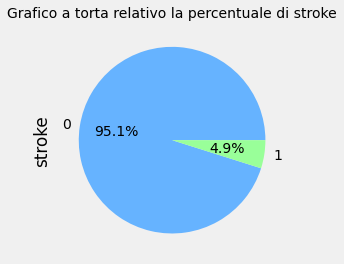

In [52]:
# Plotto a video la percentuale di stroke==1 e ==0
plt.figure(figsize=(4,4))
train_def['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99'])
plt.title("Grafico a torta relativo la percentuale di stroke", fontdict={'fontsize': 14})
plt.show()

In [53]:
smote = SMOTE(sampling_strategy='auto')

# fit the object to our training data

X, y = smote.fit_resample(train_def.loc[:,train_def.columns!='stroke'], train_def['stroke'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (8746, 16)
Shape of y: (8746,)


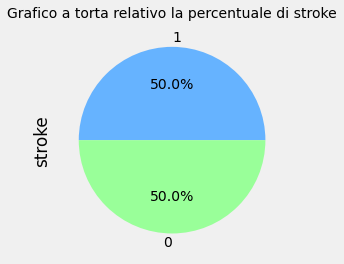

In [54]:
#Stampo un grafico a torta dei dati di training Y fillati con il metodo SMOTE

plt.figure(figsize=(4,4))
y.value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99'])
plt.title("Grafico a torta relativo la percentuale di stroke", fontdict={'fontsize': 14})
plt.show()

---------------------------------------------Logreg---------------------------------------------
operazioni di fitting completate.


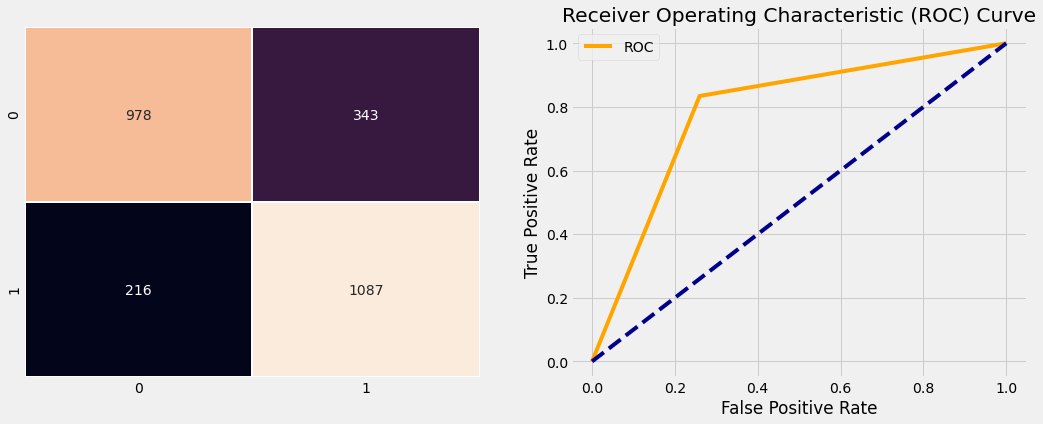

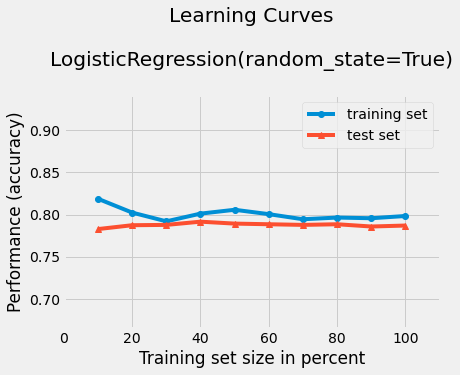


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1321
           1       0.76      0.83      0.80      1303

    accuracy                           0.79      2624
   macro avg       0.79      0.79      0.79      2624
weighted avg       0.79      0.79      0.79      2624

---------------------------------------------Random Forest---------------------------------------------
operazioni di fitting completate.


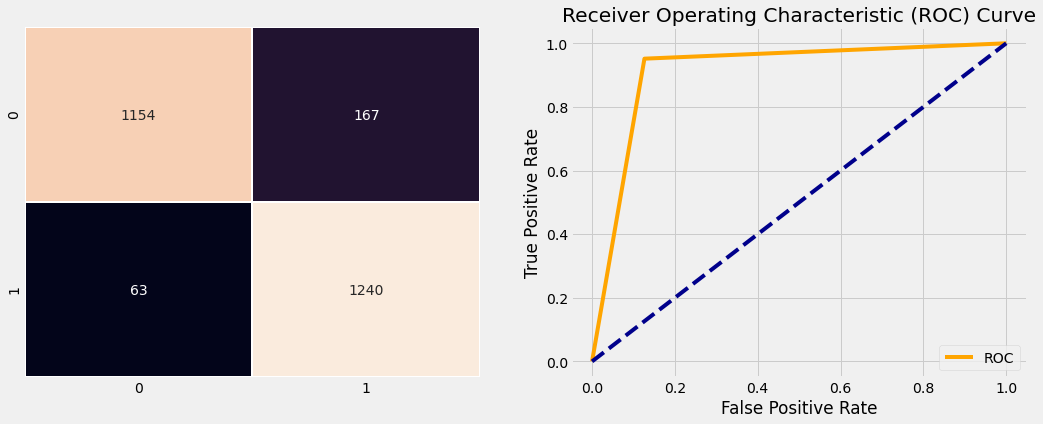

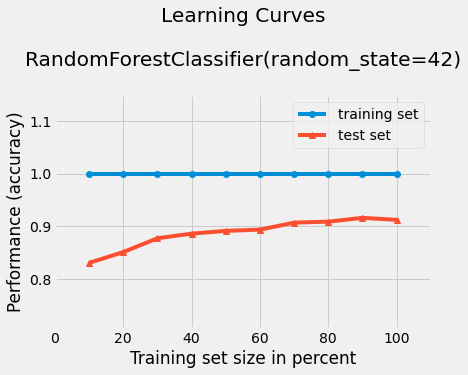


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1321
           1       0.88      0.95      0.92      1303

    accuracy                           0.91      2624
   macro avg       0.91      0.91      0.91      2624
weighted avg       0.92      0.91      0.91      2624

---------------------------------------------Support Vector Machine---------------------------------------------
operazioni di fitting completate.


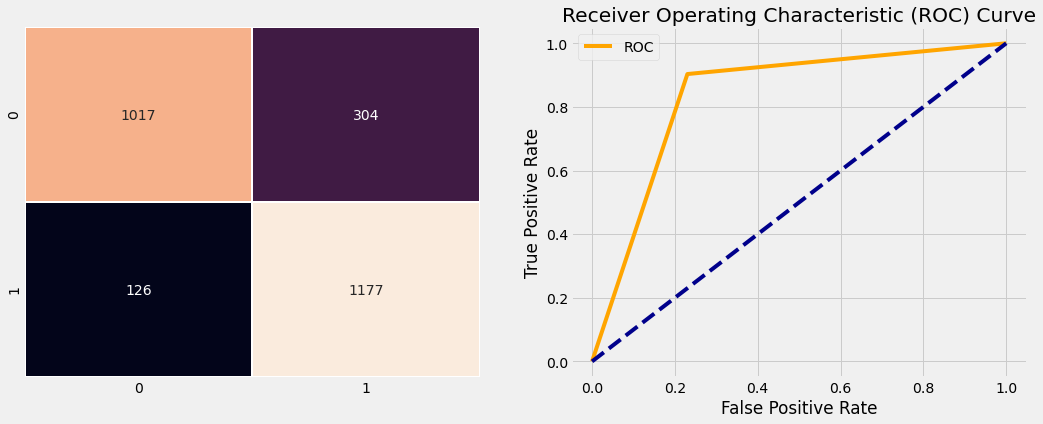

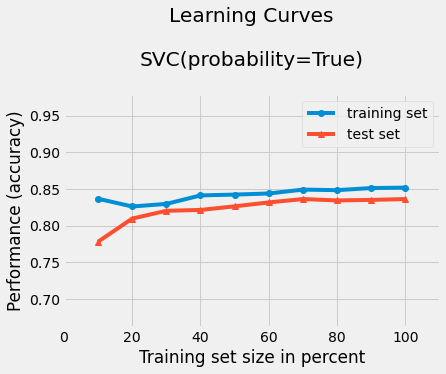


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1321
           1       0.79      0.90      0.85      1303

    accuracy                           0.84      2624
   macro avg       0.84      0.84      0.84      2624
weighted avg       0.84      0.84      0.84      2624

---------------------------------------------kNN---------------------------------------------
operazioni di fitting completate.


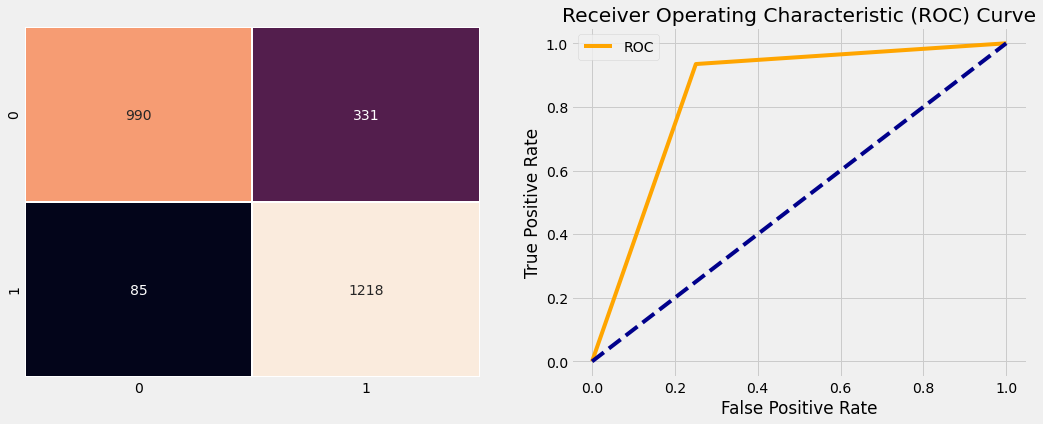

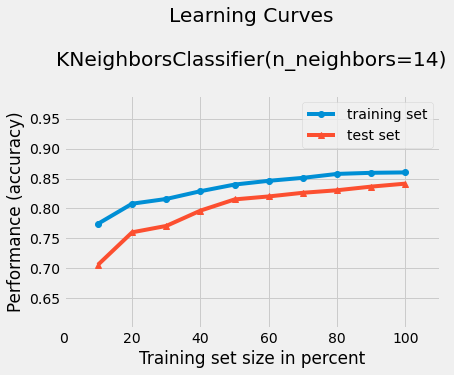


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1321
           1       0.79      0.93      0.85      1303

    accuracy                           0.84      2624
   macro avg       0.85      0.84      0.84      2624
weighted avg       0.85      0.84      0.84      2624

---------------------------------------------Naive Bayes---------------------------------------------
operazioni di fitting completate.


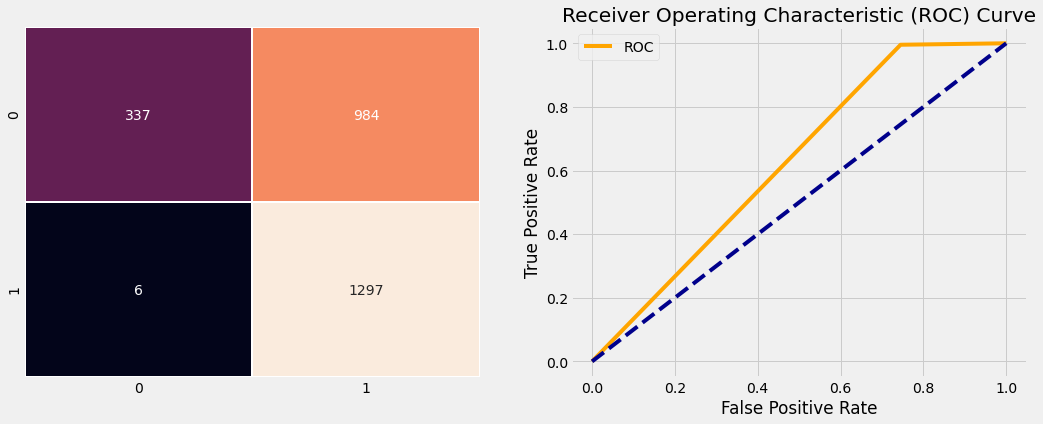

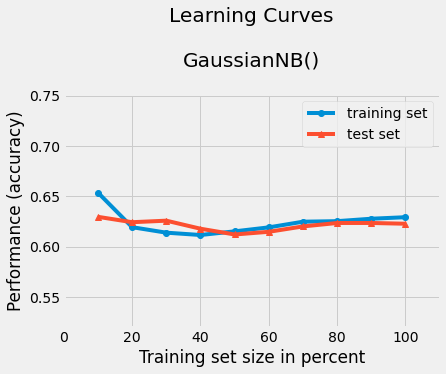


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.98      0.26      0.41      1321
           1       0.57      1.00      0.72      1303

    accuracy                           0.62      2624
   macro avg       0.78      0.63      0.56      2624
weighted avg       0.78      0.62      0.56      2624

---------------------------------------------KMeans---------------------------------------------
operazioni di fitting completate.


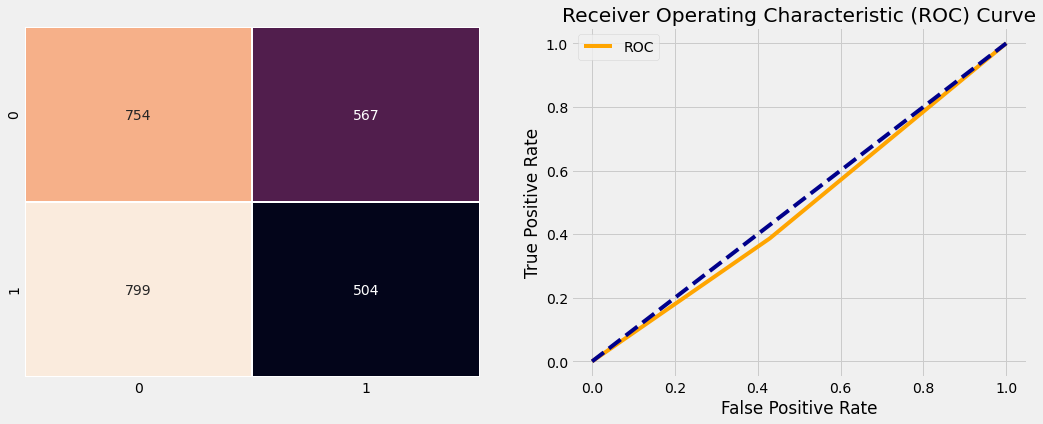

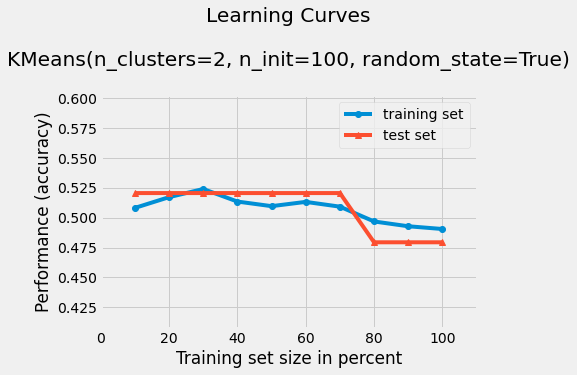


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.49      0.57      0.52      1321
           1       0.47      0.39      0.42      1303

    accuracy                           0.48      2624
   macro avg       0.48      0.48      0.47      2624
weighted avg       0.48      0.48      0.47      2624

---------------------------------------------Perceptron---------------------------------------------
operazioni di fitting completate.


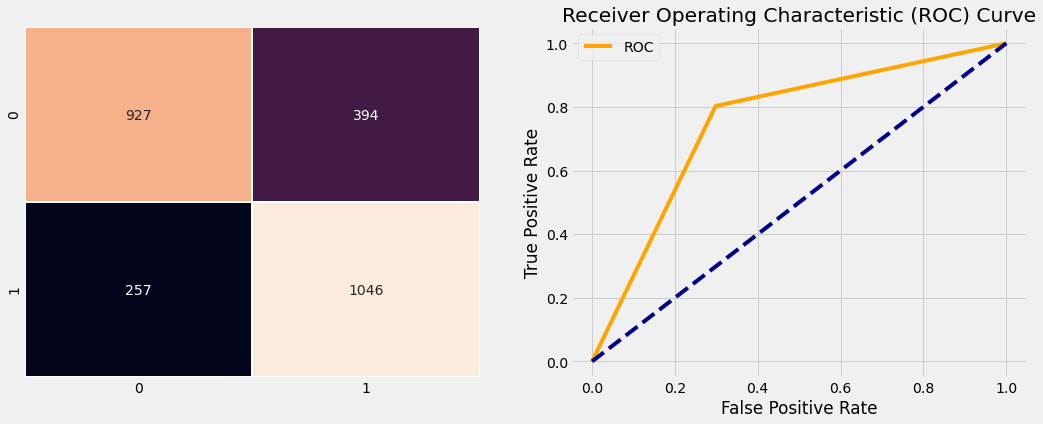

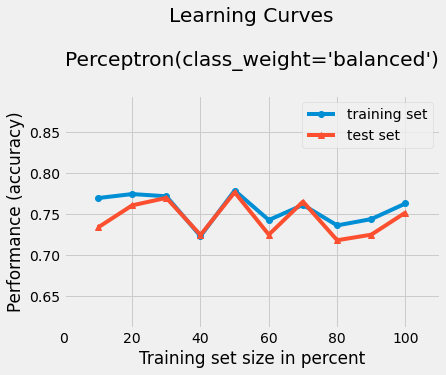


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1321
           1       0.73      0.80      0.76      1303

    accuracy                           0.75      2624
   macro avg       0.75      0.75      0.75      2624
weighted avg       0.75      0.75      0.75      2624

---------------------------------------------MLPCP---------------------------------------------
operazioni di fitting completate.


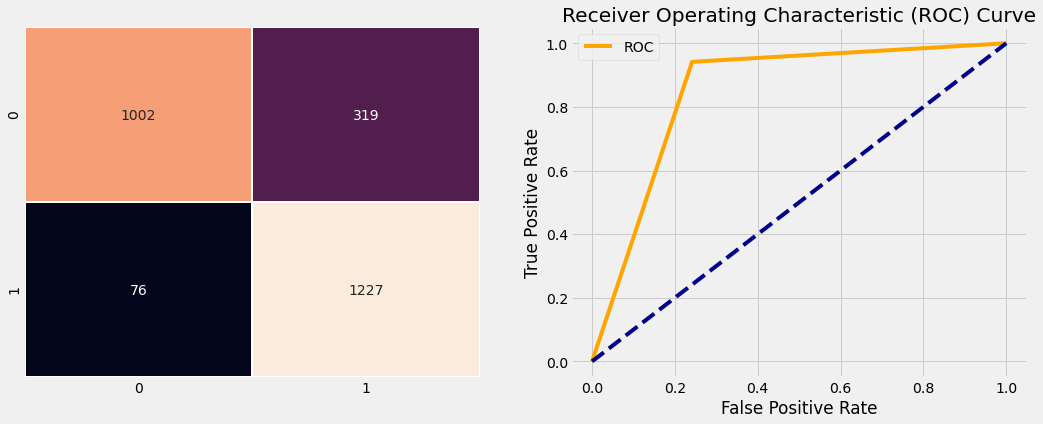

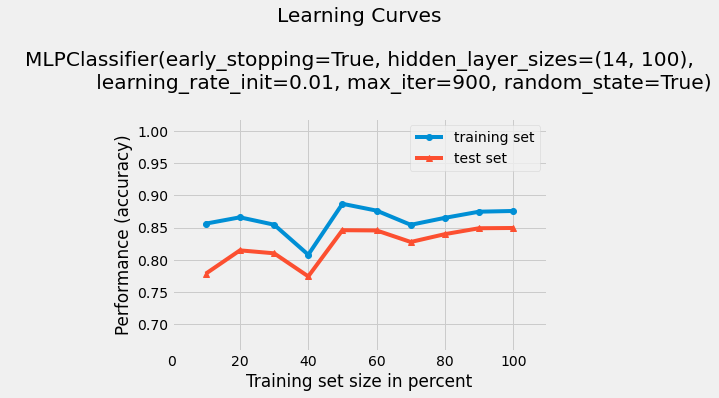


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1321
           1       0.79      0.94      0.86      1303

    accuracy                           0.85      2624
   macro avg       0.86      0.85      0.85      2624
weighted avg       0.86      0.85      0.85      2624

---------------------------------------------Gradient Boost---------------------------------------------
operazioni di fitting completate.


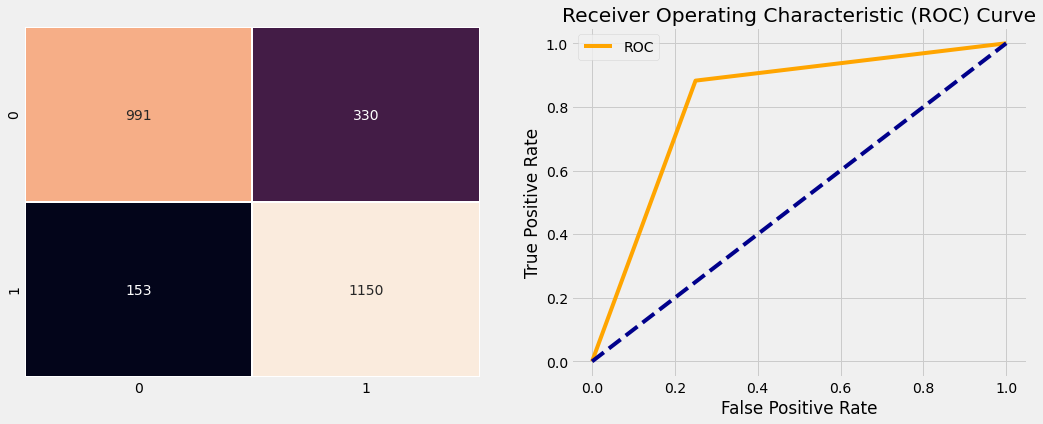

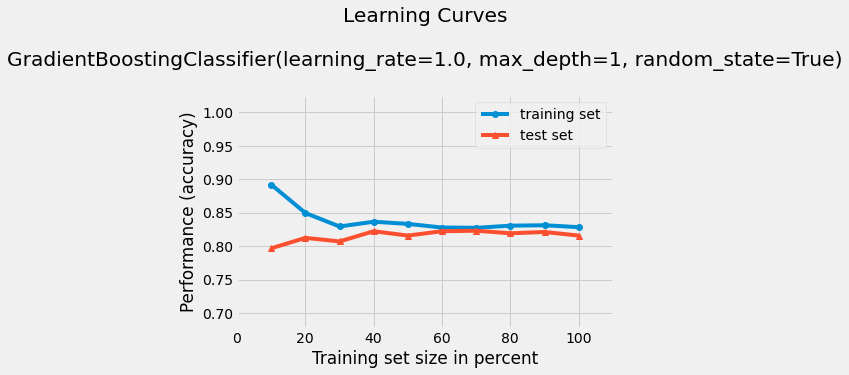


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1321
           1       0.78      0.88      0.83      1303

    accuracy                           0.82      2624
   macro avg       0.82      0.82      0.82      2624
weighted avg       0.82      0.82      0.82      2624

---------------------------------------------DecisionTree---------------------------------------------
operazioni di fitting completate.


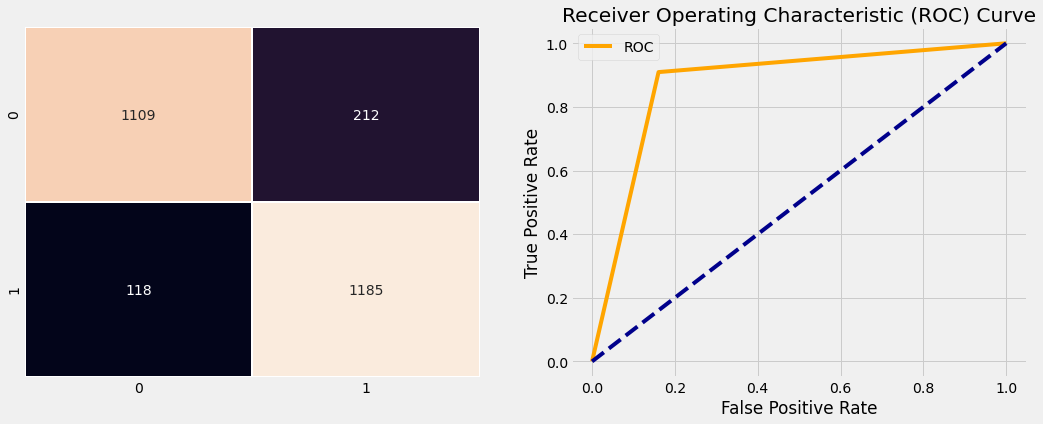

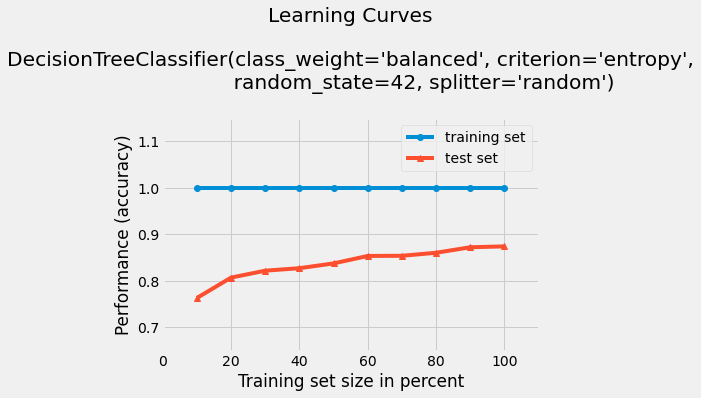


  Classification Report 
 
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1321
           1       0.85      0.91      0.88      1303

    accuracy                           0.87      2624
   macro avg       0.88      0.87      0.87      2624
weighted avg       0.88      0.87      0.87      2624



In [55]:
# splitto i dati in dati di test e train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=True, shuffle=True)

    
    
for al in algoritmi_scelti:
    
    
    print('-'*45+al+'-'*45)
    algoritmo = algoritmi_scelti[al]
    algoritmo.fit(X_train, y_train)
    print("operazioni di fitting completate.")
    y_pred = algoritmo.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    cf_matrix = confusion_matrix(**arg_test)    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    def plot_roc_curve(fpr, tpr):
        plt.plot(fpr, tpr, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        
    fig, axs = plt.subplots(ncols=2, figsize=(16,6))
    sns.heatmap(cf_matrix, annot=True, cbar=False, ax=axs[0], linewidths=1, fmt='g')
    plot_roc_curve(fpr, tpr) 
    plt.show()
    plot_learning_curves(X_train, y_train, X_test, y_test, algoritmo, scoring='accuracy')
    plt.show()
    print('\n  Classification Report \n ')
    print(classification_report(**arg_test))

### Apprendimento d'insieme

L'obiettivo alla base dei metodi di apprendimento di insieme consiste nel combinare più classificatori differenti all'interno di un meta-classificatore che offra prestazioni di generalizzazione migliori rispetto ciascun singolo classificatore. I metodi di apprendimento d'insieme ci consentono di combinare in modo strategico le previsioni ottenute dai classificatori scelti, giungendo ad una previsione più solida e precisa rispetto ogni singolo classificatore. 
Nel nostro caso, useremo il metodo di apprendimento <i>con voto a maggioranza</i> e sceglieremo gli algoritmi più performanti. 

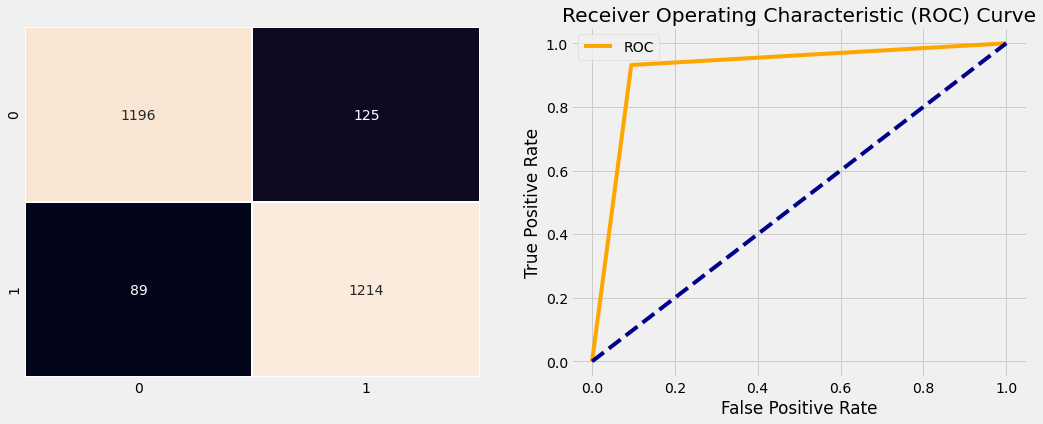

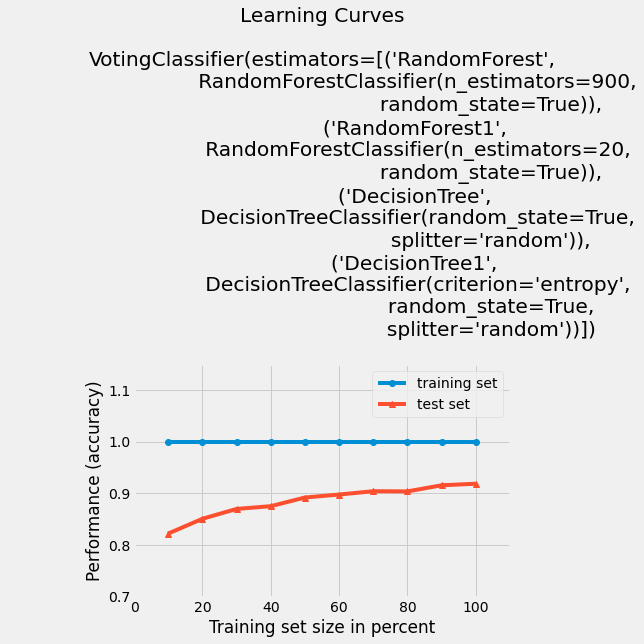

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1321
           1       0.91      0.93      0.92      1303

    accuracy                           0.92      2624
   macro avg       0.92      0.92      0.92      2624
weighted avg       0.92      0.92      0.92      2624

0.9184451219512195


In [56]:
valutatori =[]
val1= RandomForestClassifier(n_estimators=900, random_state=True)
valutatori.append(('RandomForest', val1))
val2= RandomForestClassifier(n_estimators=20, random_state=True)
valutatori.append(('RandomForest1', val2))
val3= DecisionTreeClassifier(criterion='gini',splitter='random',random_state=True)
valutatori.append(('DecisionTree',val3))
val4= DecisionTreeClassifier(criterion='entropy',splitter='random', random_state=True)
valutatori.append(('DecisionTree1',val4))

ensemblevoting= VotingClassifier(estimators=valutatori,voting='hard')


ensemblevoting.fit(X_train,y_train)

y_pred = ensemblevoting.predict(X_test)
arg_test2 = {'y_true':y_test, 'y_pred':y_pred}
cf_matrix = confusion_matrix(**arg_test2)    
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr):
        plt.plot(fpr, tpr, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
sns.heatmap(cf_matrix, annot=True, cbar=False, ax=axs[0], linewidths=1, fmt='g')
plot_roc_curve(fpr, tpr) 
plt.show()  

plot_learning_curves(X_train, y_train, X_test, y_test, ensemblevoting, scoring='accuracy')
plt.show()
print(classification_report(**arg_test2))
print(accuracy_score(**arg_test2))

### Test dell'algoritmo di apprendimento d'insieme sul file "dataset_Stroke_eval.csv"

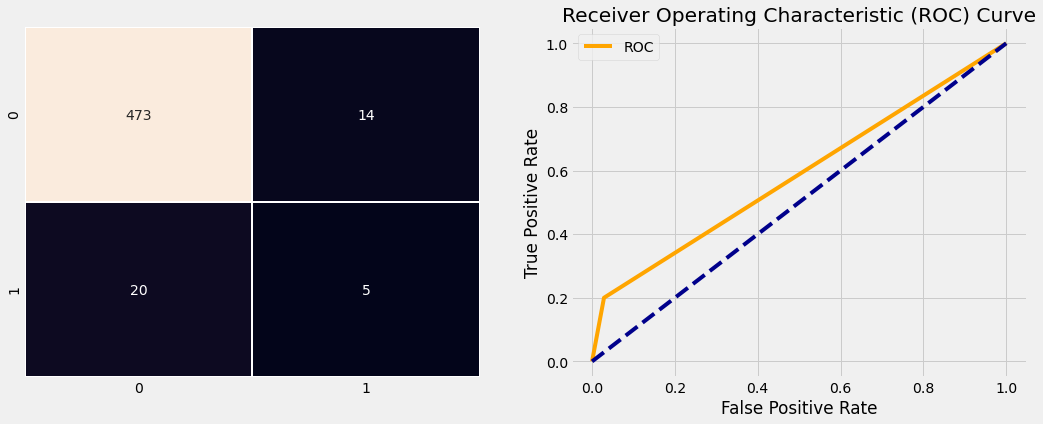

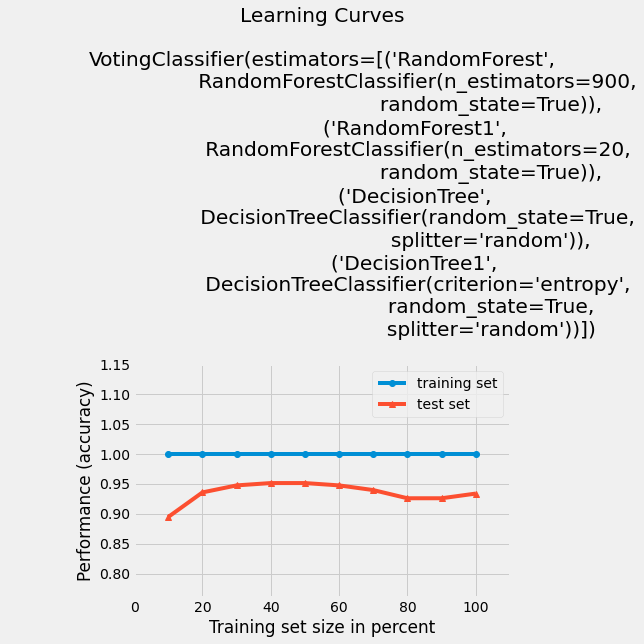

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       487
           1       0.26      0.20      0.23        25

    accuracy                           0.93       512
   macro avg       0.61      0.59      0.60       512
weighted avg       0.93      0.93      0.93       512

0.93359375


In [57]:
test = pd.read_csv("dataset_Stroke_eval.csv")

test = test.drop(columns=['id'])

test['Residence_type']= test['Residence_type'].replace({'Urban': 1, 'Rural': 0})
test['gender']= test['gender'].replace({'Female': 1, 'Male': 0})
test['ever_married']= test['ever_married'].replace({'Yes': 1, 'No': 0})

nuovo_test = pd.get_dummies(test['work_type'], drop_first=False)
test_2 = test.join(nuovo_test)
test_2=test_2.drop(columns=['work_type'])

fumatori_test = pd.get_dummies(test['smoking_status'], drop_first=False)
test_2 = test_2.join(fumatori)
test_2=test_2.drop(columns=['smoking_status'])

test_def = test_2
test_def[['age','avg_glucose_level','bmi']]= scaler.fit_transform(test_def[['age','avg_glucose_level','bmi']])


test_def['bmi'].fillna(np.round(test_def['bmi'].mean(), 1), inplace = True)

test_def = test_def.drop('Unknown',1)

r_test = test_def.loc[:, test_def.columns != 'stroke']
s_test = test_def['stroke']

# model=RandomForestClassifier(n_estimators=900, random_state=True)

valutatori =[]
val1= RandomForestClassifier(n_estimators=900, random_state=True)
valutatori.append(('RandomForest', val1))
val2= RandomForestClassifier(n_estimators=20, random_state=True)
valutatori.append(('RandomForest1', val2))
val3= DecisionTreeClassifier(criterion='gini',splitter='random', random_state=True)
valutatori.append(('DecisionTree',val3))
val4= DecisionTreeClassifier(criterion='entropy',splitter='random', random_state=True)
valutatori.append(('DecisionTree1',val4))



ensemblevoting= VotingClassifier(estimators=valutatori,voting='hard')

ensemblevoting.fit(X,y)
# model.fit(X,y)
s_pred = ensemblevoting.predict(r_test)
arg_test2 = {'y_true':s_test, 'y_pred':s_pred}
cf_matrix = confusion_matrix(**arg_test2)    
fpr, tpr, thresholds = roc_curve(s_test, s_pred)
def plot_roc_curve(fpr, tpr):
        plt.plot(fpr, tpr, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
sns.heatmap(cf_matrix, annot=True, cbar=False, ax=axs[0], linewidths=1, fmt='g')
plot_roc_curve(fpr, tpr) 
plt.show()  

plot_learning_curves(X, y, r_test, s_test, ensemblevoting, scoring='accuracy')
plt.show()
print(classification_report(**arg_test2))
print(accuracy_score(**arg_test2))

# Step 7

Riportare tale strategia (preferibilmente in una unica pipeline) e salvare il modello ottenuto in formato pikle o joblib per la fase di valutazione.

In [58]:
valutatori =[]
val1= RandomForestClassifier(n_estimators=900, random_state=True)
valutatori.append(('RandomForest', val1))
val2= RandomForestClassifier(n_estimators=20, random_state=True)
valutatori.append(('RandomForest1', val2))
val3= DecisionTreeClassifier(criterion='gini',splitter='random', random_state=True)
valutatori.append(('DecisionTree',val3))
val4= DecisionTreeClassifier(criterion='entropy',splitter='random', random_state=True)
valutatori.append(('DecisionTree1',val4))

maggioranza = VotingClassifier(estimators=valutatori,voting='hard')

maggioranza.fit(X,y)

filename = 'modello_finale.sav'
joblib.dump(model, filename)


['modello_finale.sav']